In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
%matplotlib inline
%matplotlib notebook

In [2]:
data=pd.read_csv(r"C:\Users\jayan\OneDrive\Desktop\DIET GYM\train.csv")

In [3]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
# Droping unnecessary coloumns
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
data.drop(['id'],axis=1,inplace=True)

In [6]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
print('the data shape of data is {}'.format(data.shape))
print('the no of features in this data set is {} '.format(data.shape[1]))

the data shape of data is (103904, 23)
the no of features in this data set is 23 


In [ ]:
# Data Description

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.0,3.0,4.0,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.0,3.0,4.0,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103904.0,3.358158,1.332991,0.0,2.0,4.0,4.0,5.0


In [10]:
# Null values Finding
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [ ]:
# visulization of null values 

<IPython.core.display.Javascript object>


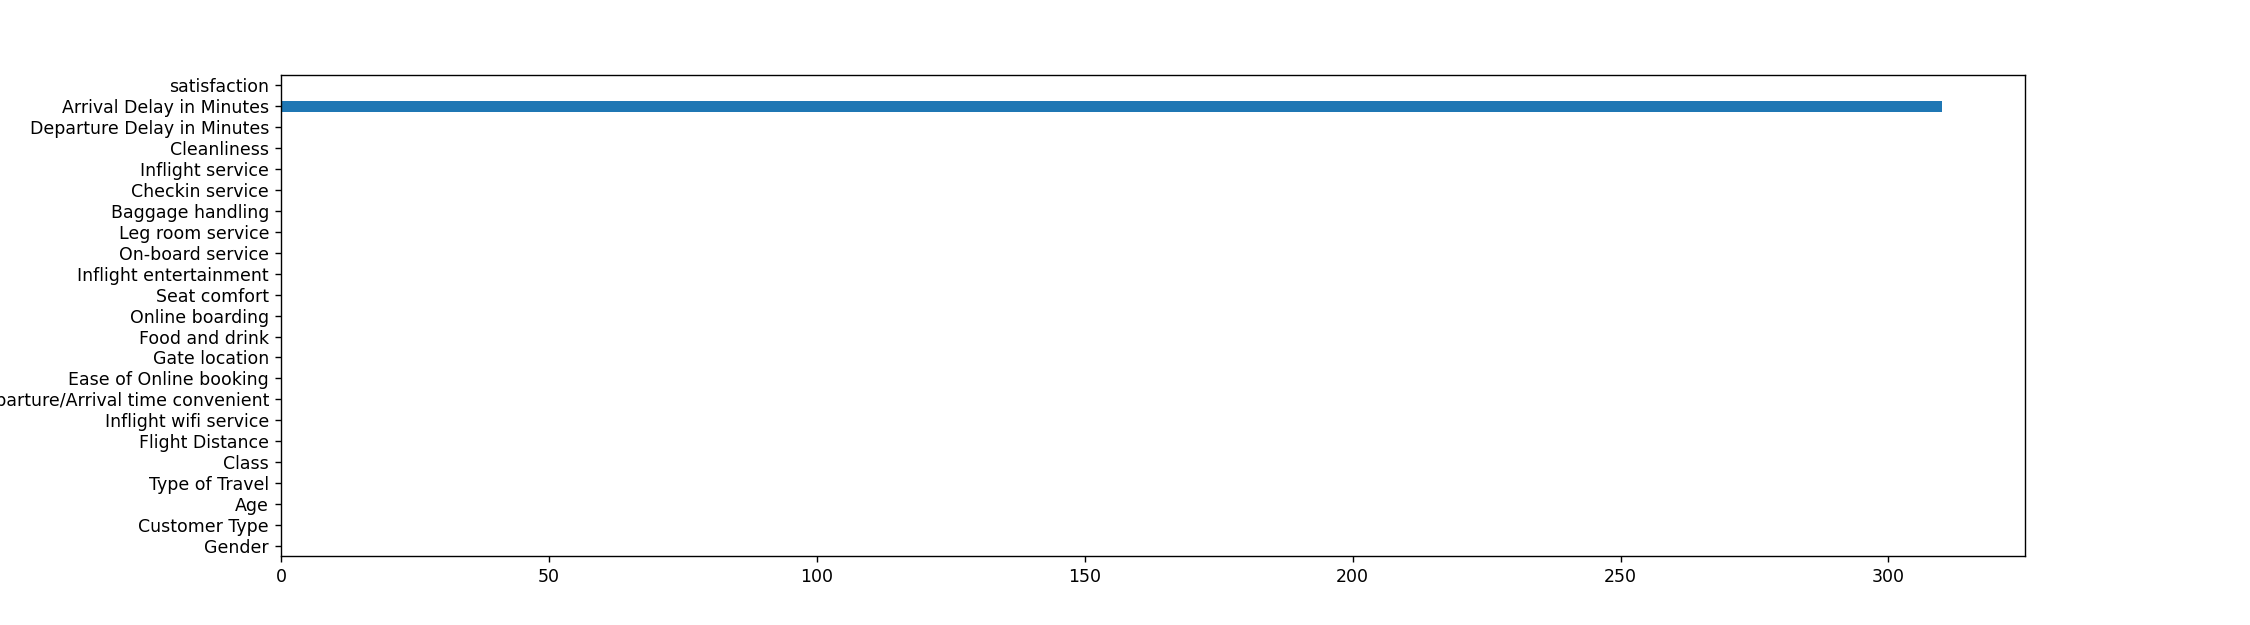

<Axes: >

In [11]:
data.isnull().sum().plot(kind='barh',figsize=(18,5))

In [ ]:
# setting arrival delay in minutes equal to departure delay in minutes since they are highly correlated

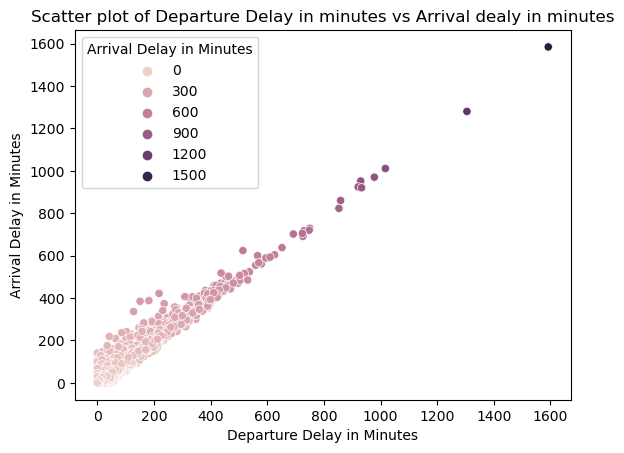

In [13]:
%matplotlib inline
sns.scatterplot(x=data['Departure Delay in Minutes'], y=data['Arrival Delay in Minutes'], hue=data['Arrival Delay in Minutes'])
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Arrival Delay in Minutes')
plt.title('Scatter plot of Departure Delay in minutes vs Arrival dealy in minutes')
plt.show()

In [14]:
df1=data.copy()

In [15]:
# finding null values
Null_values=df1.loc[df1['Arrival Delay in Minutes'].isnull()]
Null_values

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,3,...,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,3,...,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,1,...,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,1,...,5,1,5,5,5,3,5,0,NaN,satisfied


In [ ]:
# Replacing null values with Departure times

In [16]:
df1['Arrival Delay in Minutes']=df1['Arrival Delay in Minutes'].fillna(df1['Departure Delay in Minutes'])
df1

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [17]:
# Re checking for null values
df1.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [18]:
df1.shape

(103904, 23)

In [19]:
# featiure Names
for col in df1.columns:
    print(col)

Gender
Customer Type
Age
Type of Travel
Class
Flight Distance
Inflight wifi service
Departure/Arrival time convenient
Ease of Online booking
Gate location
Food and drink
Online boarding
Seat comfort
Inflight entertainment
On-board service
Leg room service
Baggage handling
Checkin service
Inflight service
Cleanliness
Departure Delay in Minutes
Arrival Delay in Minutes
satisfaction


In [ ]:
# print numerical and categorical feature types 

In [20]:
# numrical features
print('the numerical features are:')
num_features=df1.select_dtypes(include=['int64','float64'])
for c in num_features.columns:
    print(c)

the numerical features are:
Age
Flight Distance
Inflight wifi service
Departure/Arrival time convenient
Ease of Online booking
Gate location
Food and drink
Online boarding
Seat comfort
Inflight entertainment
On-board service
Leg room service
Baggage handling
Checkin service
Inflight service
Cleanliness
Departure Delay in Minutes
Arrival Delay in Minutes


In [21]:
# caterogical values
print('the caterogical value are:')
cat_features=df1.select_dtypes(include=['object'])
for c in cat_features:
    print(c)

the caterogical value are:
Gender
Customer Type
Type of Travel
Class
satisfaction


In [ ]:
# Target Feature - satisFaction

In [22]:
# Distribution of target feature

print('the distribution of the target feature is :')
tf=df1[['satisfaction']].value_counts()
tf

the distribution of the target feature is :


satisfaction           
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [ ]:
# Target feature distribution visulization

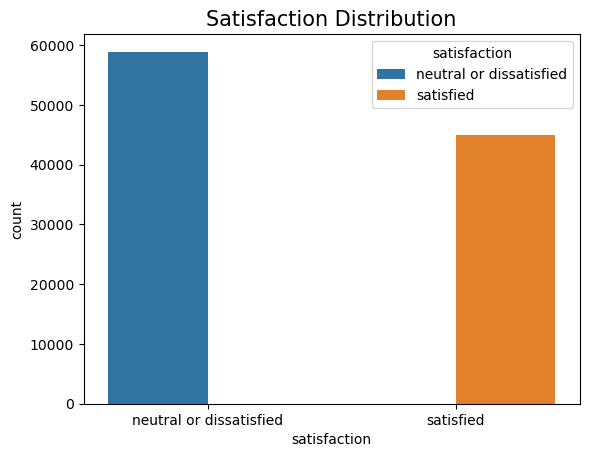

In [23]:
import seaborn as sns
%matplotlib inline
sns.countplot(x='satisfaction',data=df1,hue='satisfaction')
plt.title('Satisfaction Distribution',fontsize=15)
plt.show()

In [ ]:
# Percentage distribution


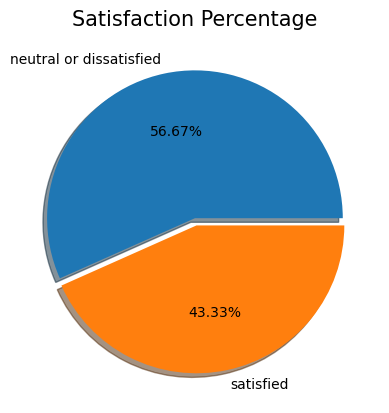

In [24]:
plt.pie(df1['satisfaction'].value_counts(),labels=['neutral or dissatisfied','satisfied'],explode=[0,0.05],autopct='%1.2f%%',shadow=True)
plt.title('Satisfaction Percentage',fontsize=15)
plt.show()

# No class imbalance observed . The data is balanced across both classes satisfied and Neutral or Dissatisfied

In [ ]:
# Histograms

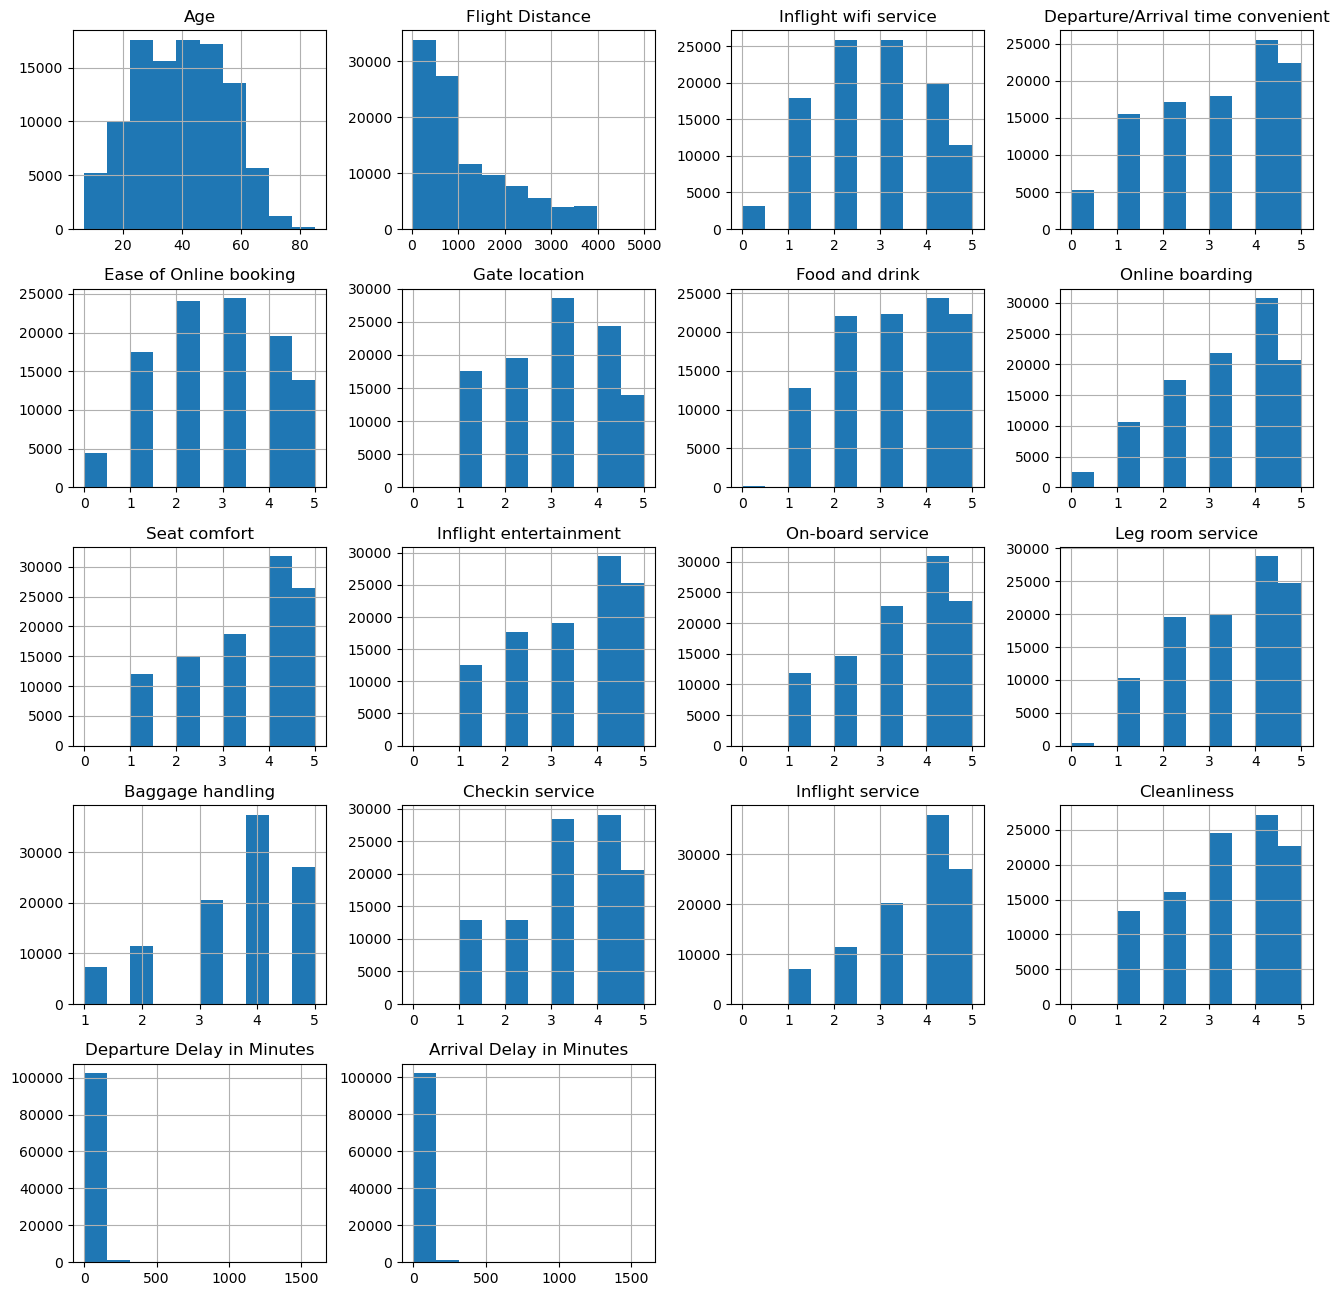

In [97]:
df1.hist(figsize=(16,16))
plt.show()

In [ ]:
 # Age Distribution 

In [98]:
import warnings
warnings.filterwarnings('ignore')

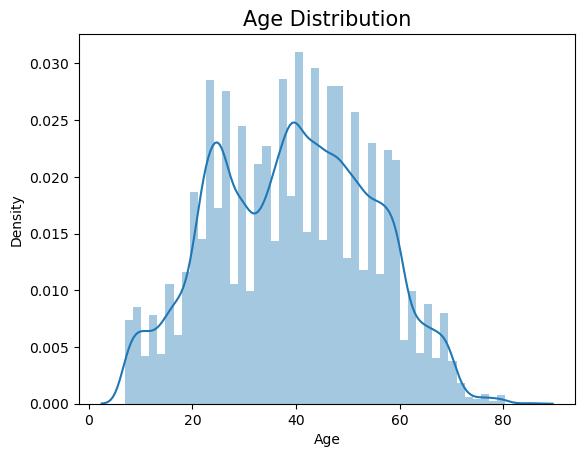

In [99]:
sns.distplot(df1['Age'])
plt.title("Age Distribution", fontsize=15)
plt.show()

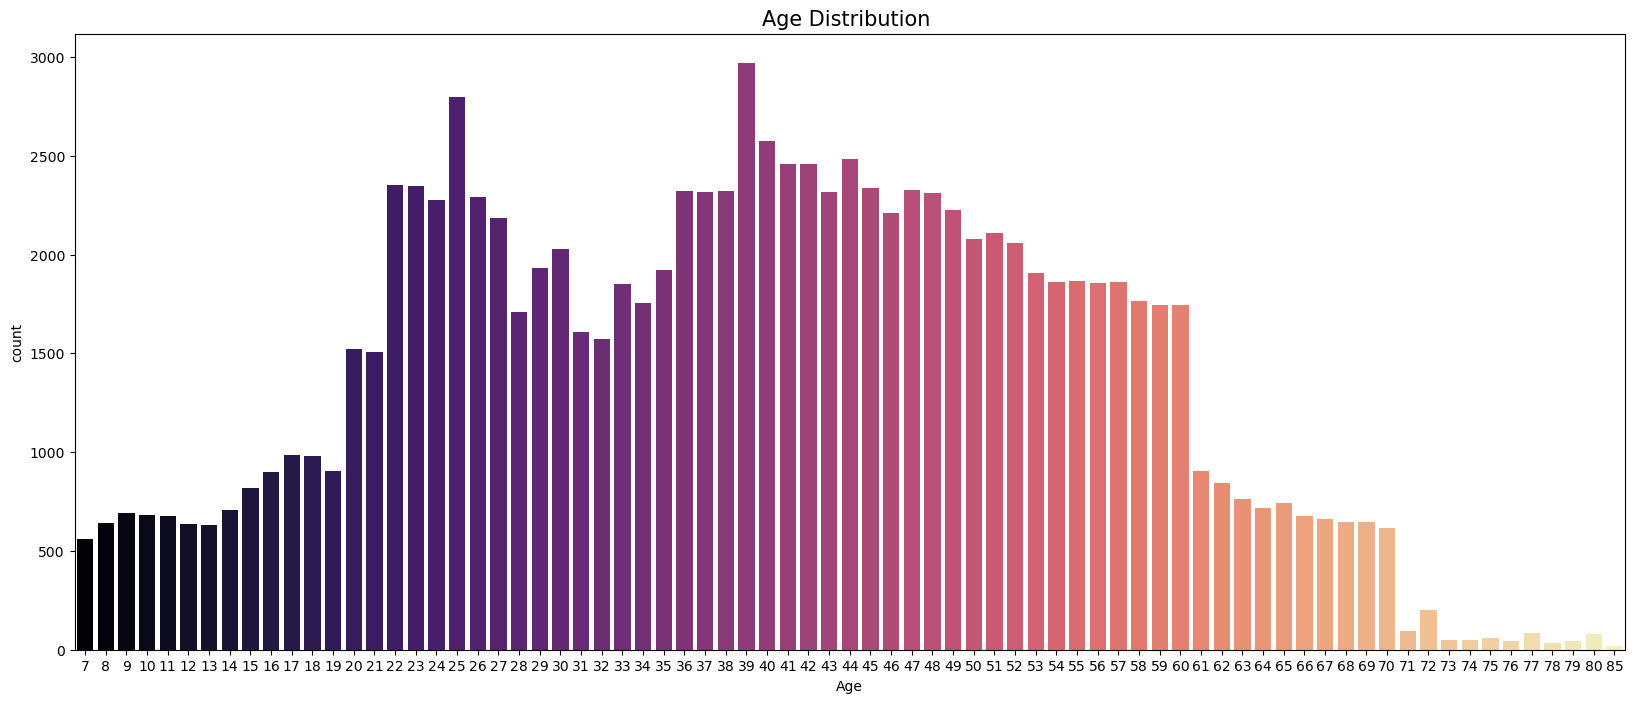

In [103]:
%matplotlib inline
plt.figure(figsize=(20,8))
sns.countplot(x='Age',data=df1,palette='magma')
plt.title('Age Distribution ', fontsize=15)
plt.show()

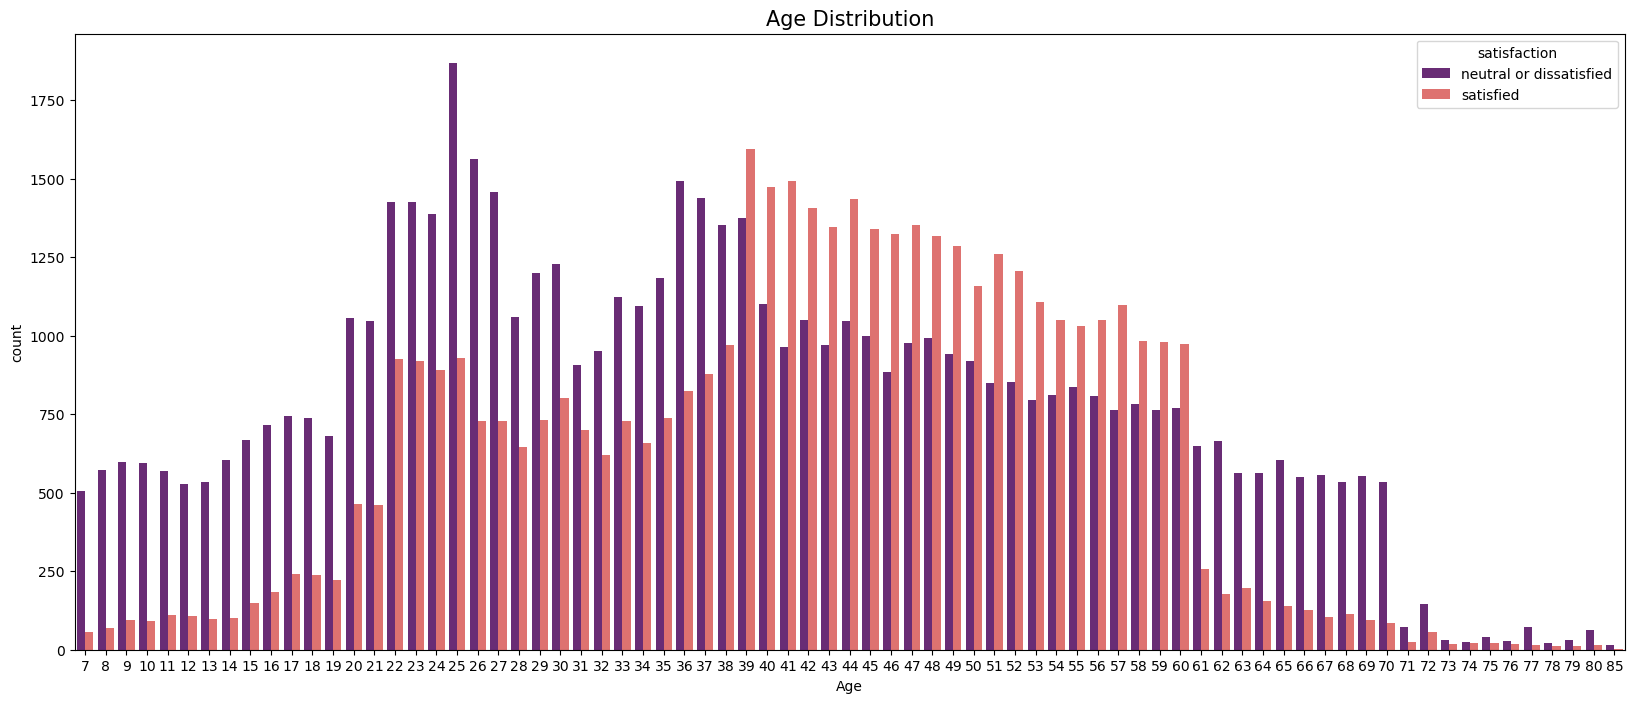

In [104]:
%matplotlib inline
plt.figure(figsize=(20,8))
sns.countplot(x='Age',data=df1,palette='magma',hue='satisfaction')
plt.title('Age Distribution',fontsize=15)
plt.show()

# Pie charts of string variables

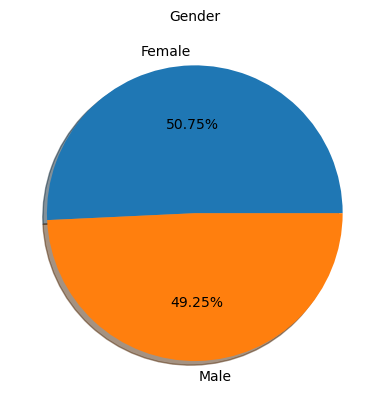

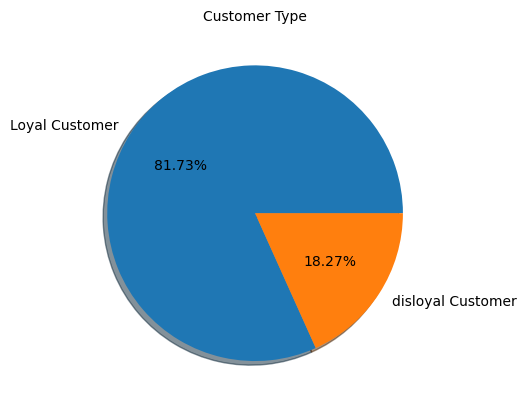

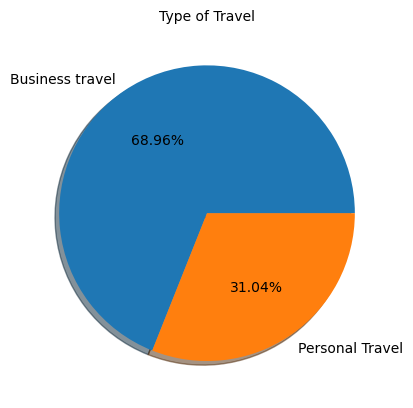

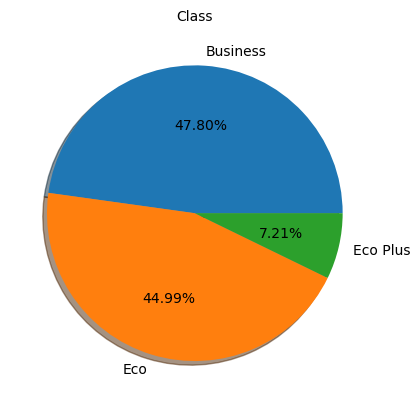

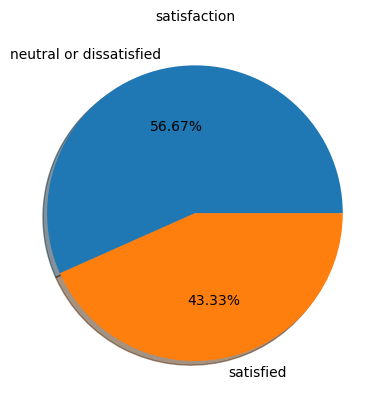

In [27]:
for i in cat_features:
    plt.pie(df1[i].value_counts(),labels=df1[i].value_counts().index,
           autopct='%1.2f%%',shadow=True)
    plt.title(i,fontsize=10)
    plt.show()

# flight distance & customer satisfaction

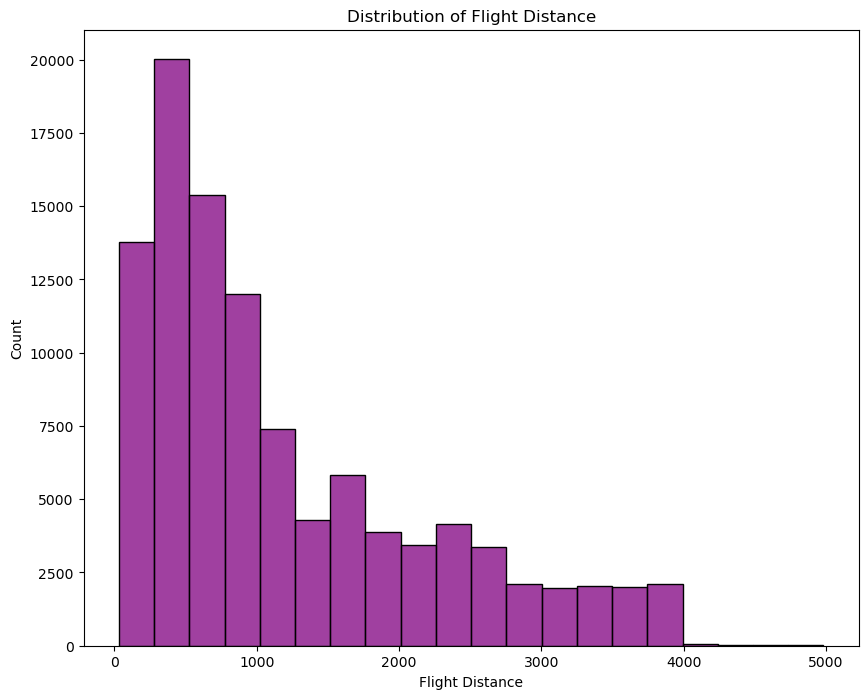

In [28]:
plt.figure(figsize=(10, 8))
sns.histplot(x='Flight Distance', data=data, bins=20,color='purple')
plt.title('Distribution of Flight Distance')
plt.show()

D:\Data Science\python\jupyter_python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


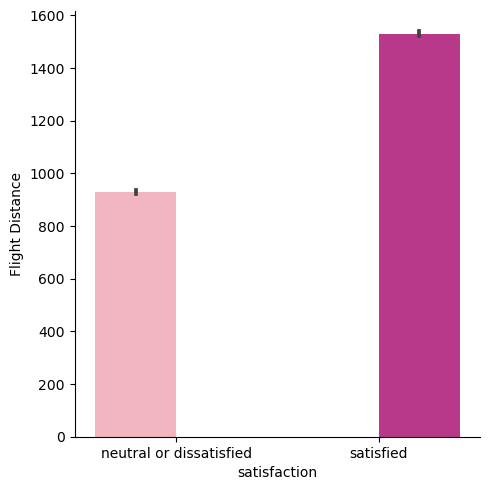

In [29]:
g=sns.catplot(x='satisfaction',y='Flight Distance',data=data,kind='bar',hue='satisfaction',palette='RdPu')

 # Flight class & Customer satifaction

D:\Data Science\python\jupyter_python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


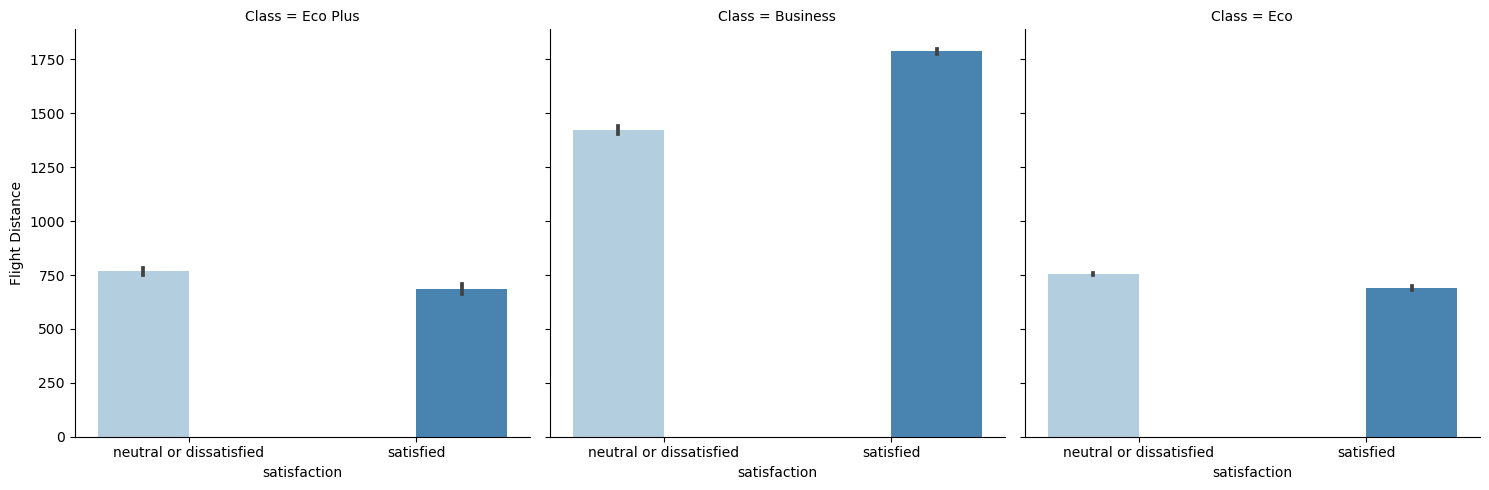

In [30]:
g = sns.catplot(x='satisfaction', y='Flight Distance', col='Class', data=df1, kind='bar', hue='satisfaction', palette='Blues')


# count plots of features

In [31]:
import warnings
warnings.filterwarnings('ignore')

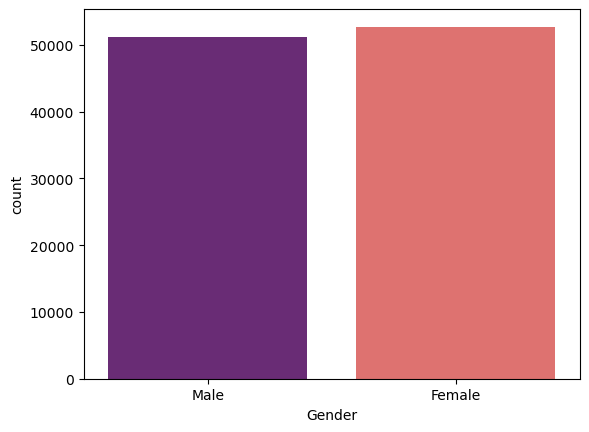

Gender
Female    52727
Male      51177
Name: count, dtype: int64


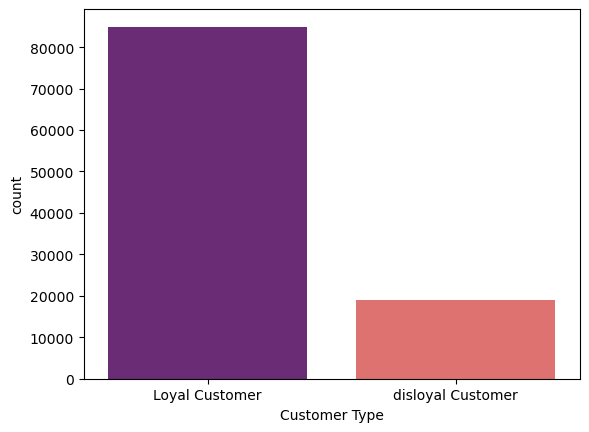

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64


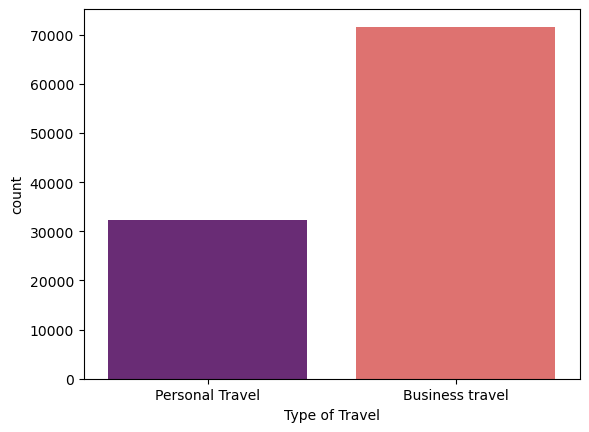

Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64


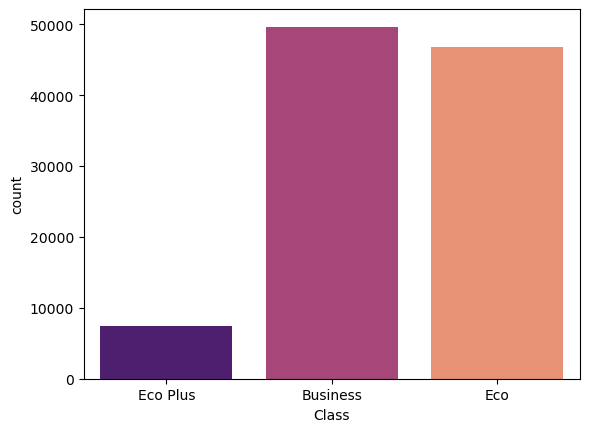

Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64


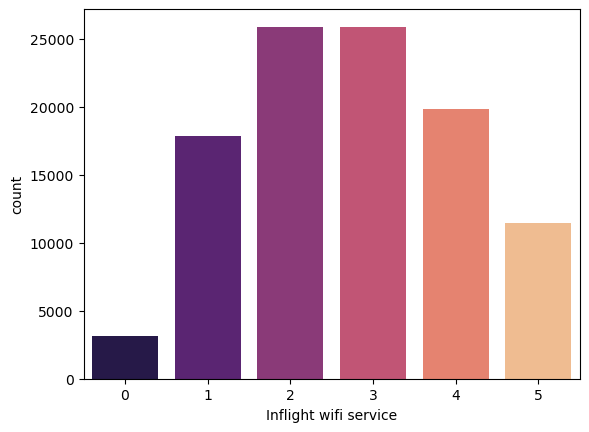

Inflight wifi service
3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: count, dtype: int64


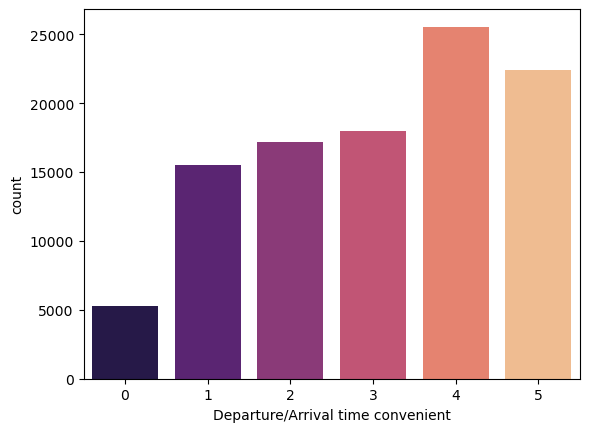

Departure/Arrival time convenient
4    25546
5    22403
3    17966
2    17191
1    15498
0     5300
Name: count, dtype: int64


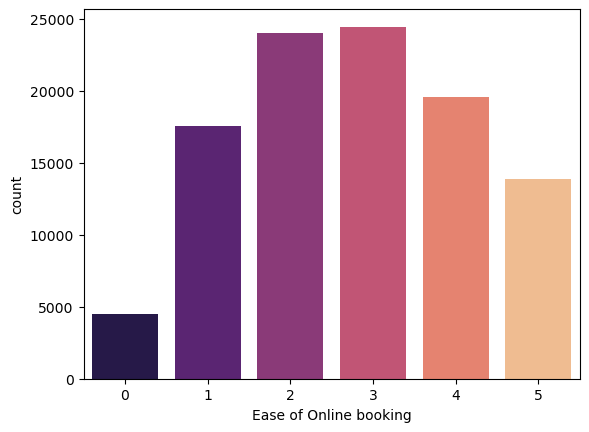

Ease of Online booking
3    24449
2    24021
4    19571
1    17525
5    13851
0     4487
Name: count, dtype: int64


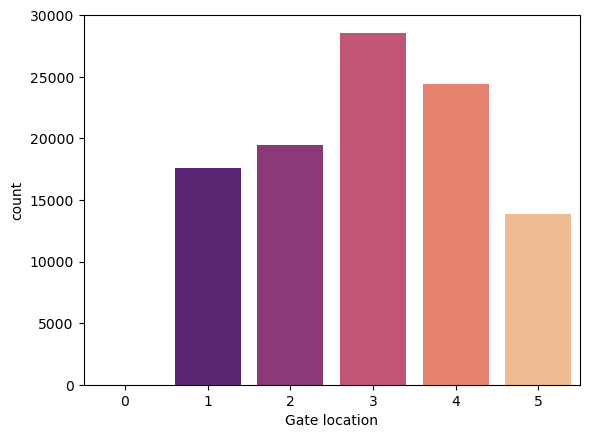

Gate location
3    28577
4    24426
2    19459
1    17562
5    13879
0        1
Name: count, dtype: int64


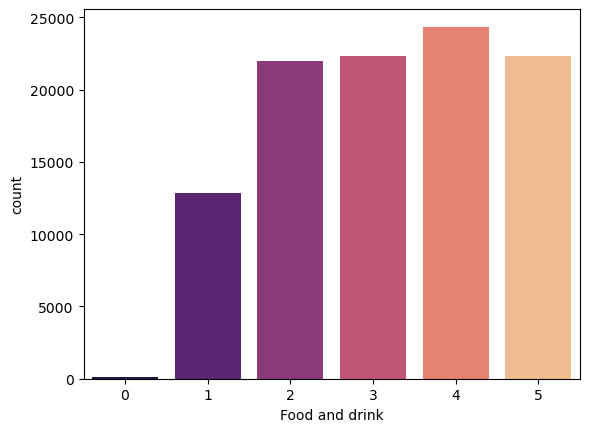

Food and drink
4    24359
5    22313
3    22300
2    21988
1    12837
0      107
Name: count, dtype: int64


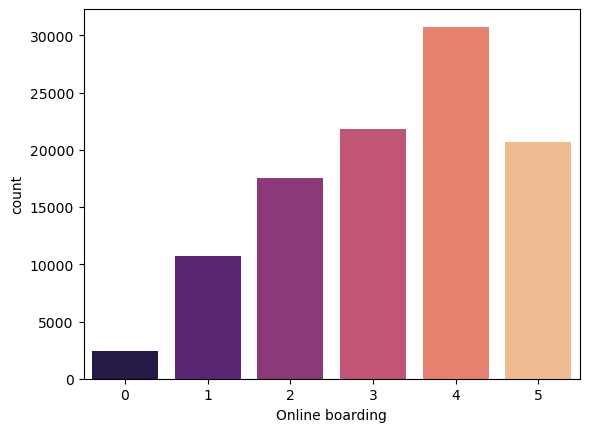

Online boarding
4    30762
3    21804
5    20713
2    17505
1    10692
0     2428
Name: count, dtype: int64


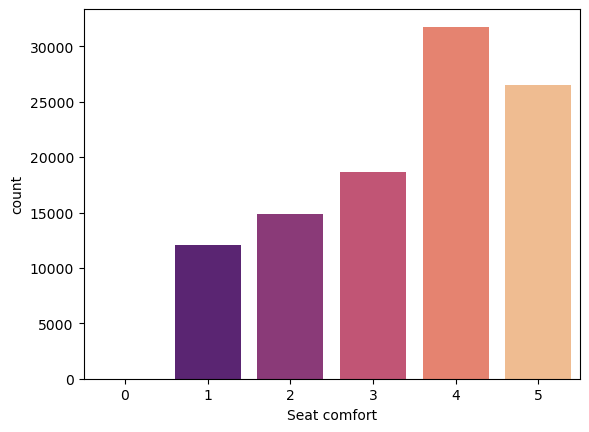

Seat comfort
4    31765
5    26470
3    18696
2    14897
1    12075
0        1
Name: count, dtype: int64


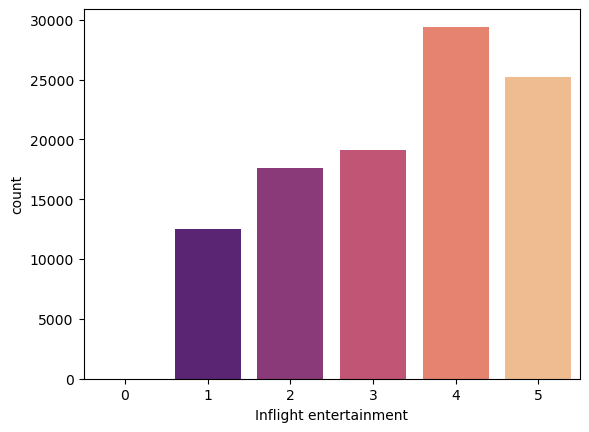

Inflight entertainment
4    29423
5    25213
3    19139
2    17637
1    12478
0       14
Name: count, dtype: int64


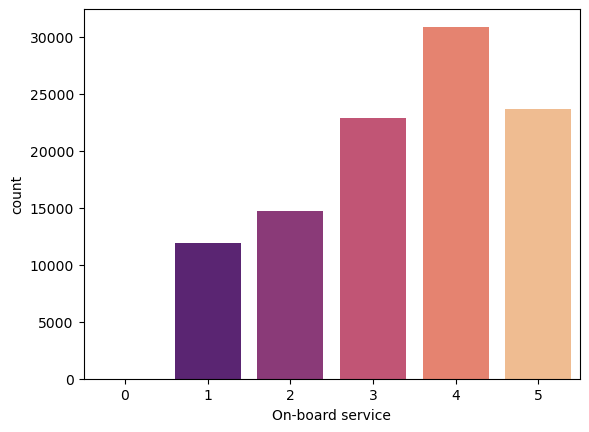

On-board service
4    30867
5    23648
3    22833
2    14681
1    11872
0        3
Name: count, dtype: int64


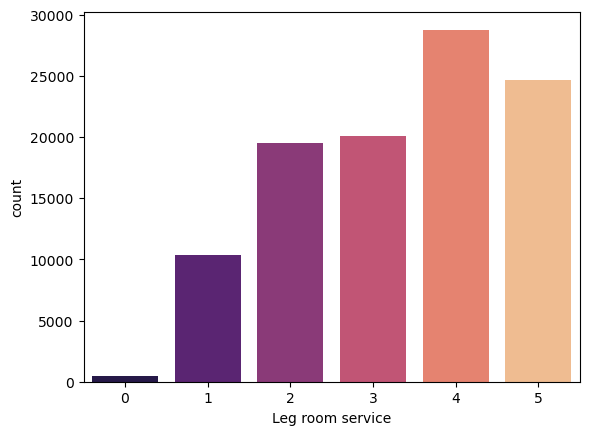

Leg room service
4    28789
5    24667
3    20098
2    19525
1    10353
0      472
Name: count, dtype: int64


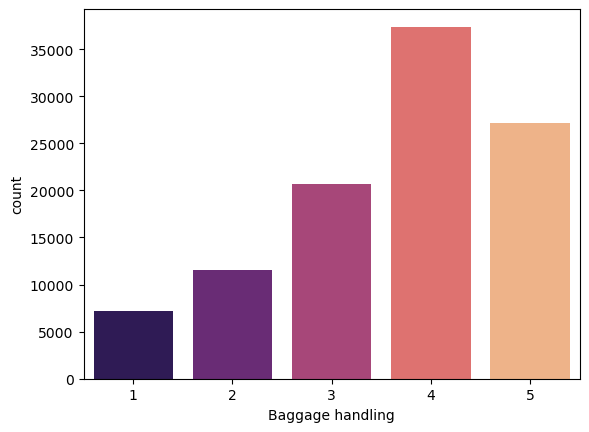

Baggage handling
4    37383
5    27131
3    20632
2    11521
1     7237
Name: count, dtype: int64


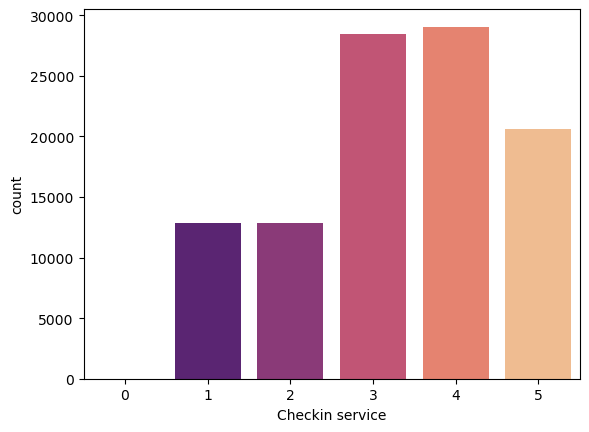

Checkin service
4    29055
3    28446
5    20619
2    12893
1    12890
0        1
Name: count, dtype: int64


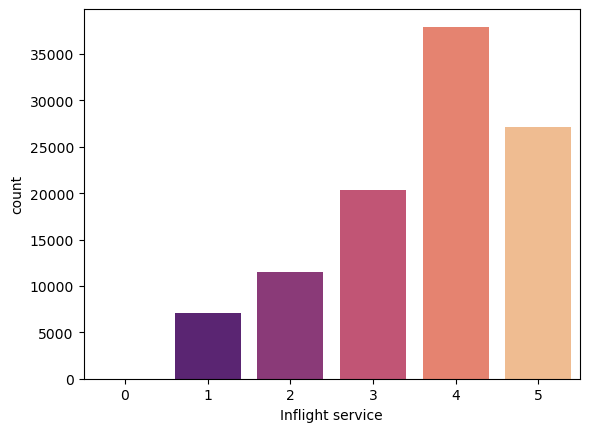

Inflight service
4    37945
5    27116
3    20299
2    11457
1     7084
0        3
Name: count, dtype: int64


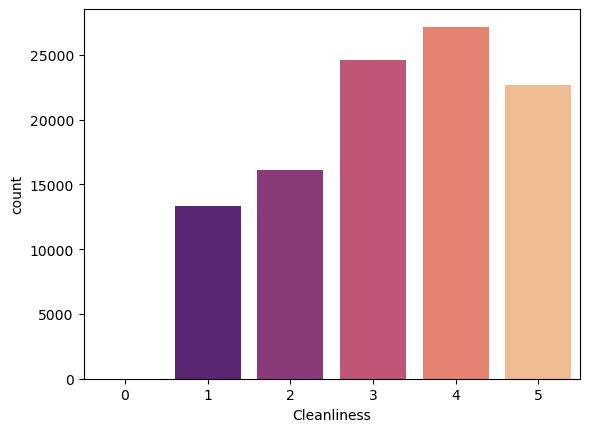

Cleanliness
4    27179
3    24574
5    22689
2    16132
1    13318
0       12
Name: count, dtype: int64


In [32]:
df_labels = df1[['Gender', 'Customer Type', 'Type of Travel', 'Class',
       'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]

labels =['Gender', 'Customer Type', 'Type of Travel', 'Class',
       'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
for label in labels:
    sns.countplot(x=label,data=df_labels, palette = "magma")
    plt.show()
    print(df1[label].value_counts())

# Count plots of features wrt satisfaction

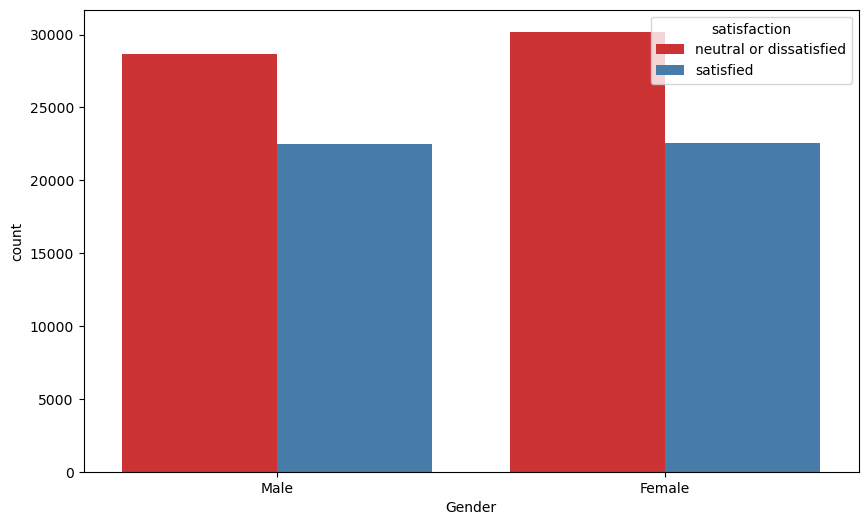

Gender
Female    52727
Male      51177
Name: count, dtype: int64


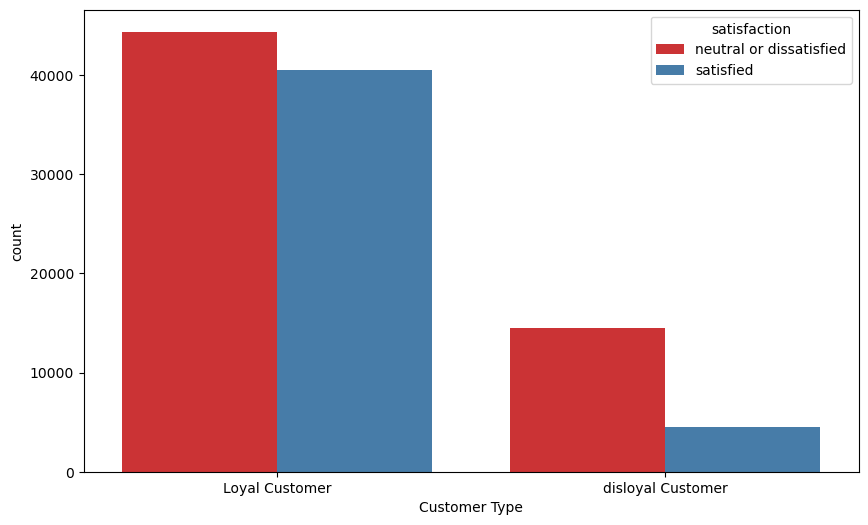

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64


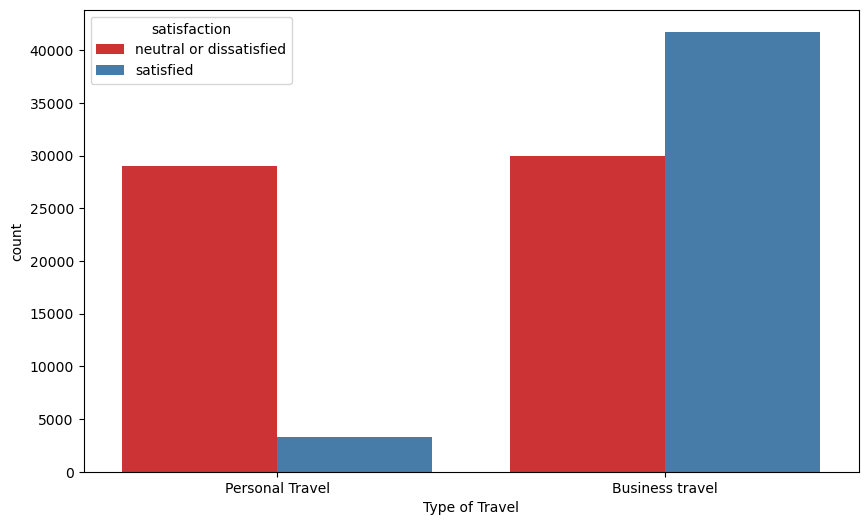

Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64


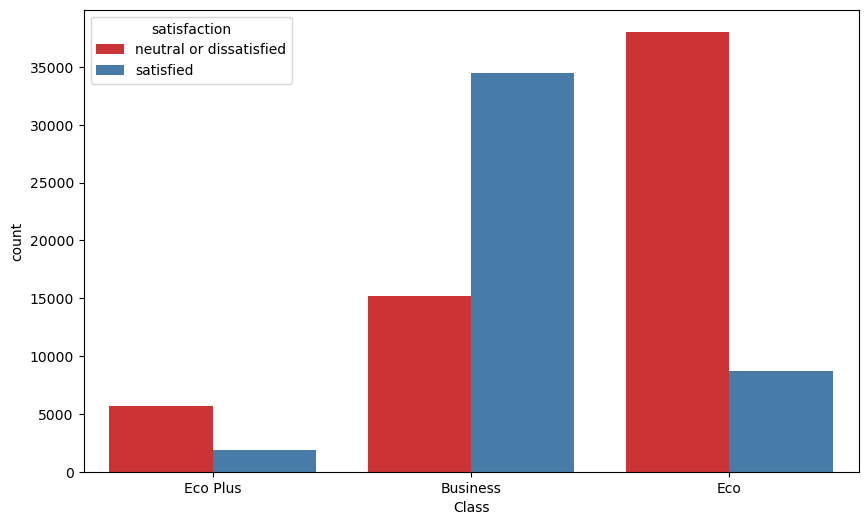

Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64


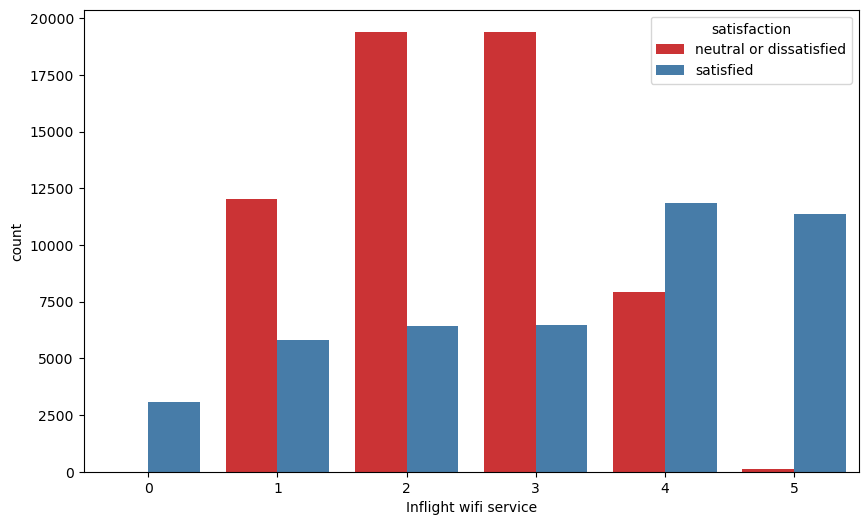

Inflight wifi service
3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: count, dtype: int64


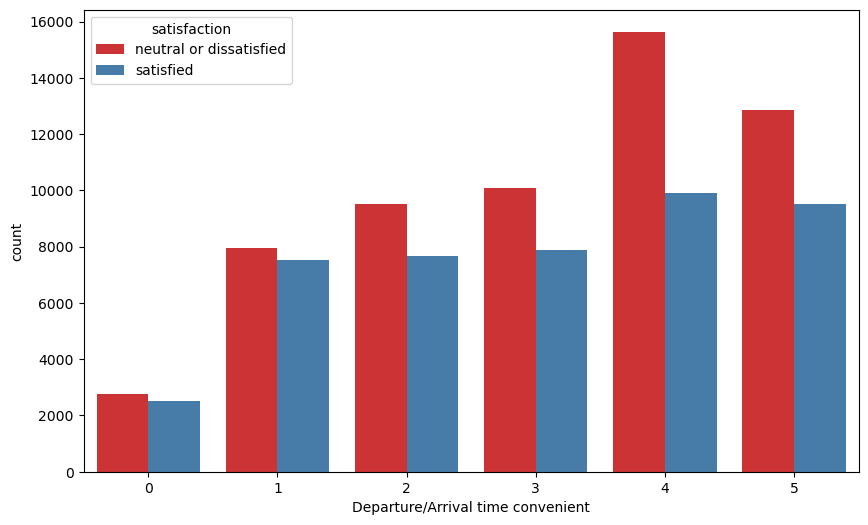

Departure/Arrival time convenient
4    25546
5    22403
3    17966
2    17191
1    15498
0     5300
Name: count, dtype: int64


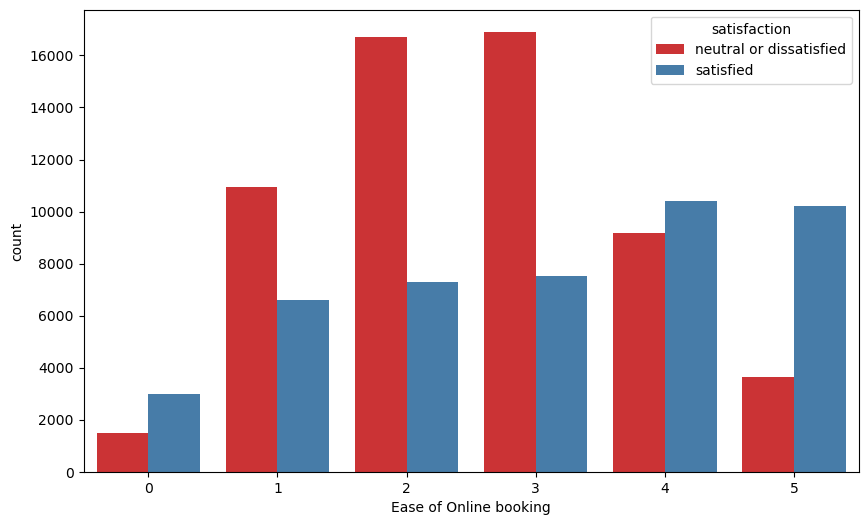

Ease of Online booking
3    24449
2    24021
4    19571
1    17525
5    13851
0     4487
Name: count, dtype: int64


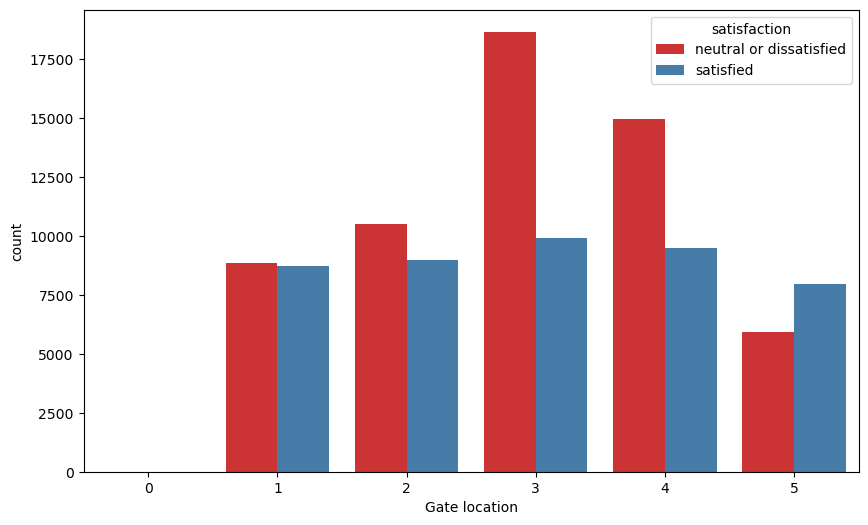

Gate location
3    28577
4    24426
2    19459
1    17562
5    13879
0        1
Name: count, dtype: int64


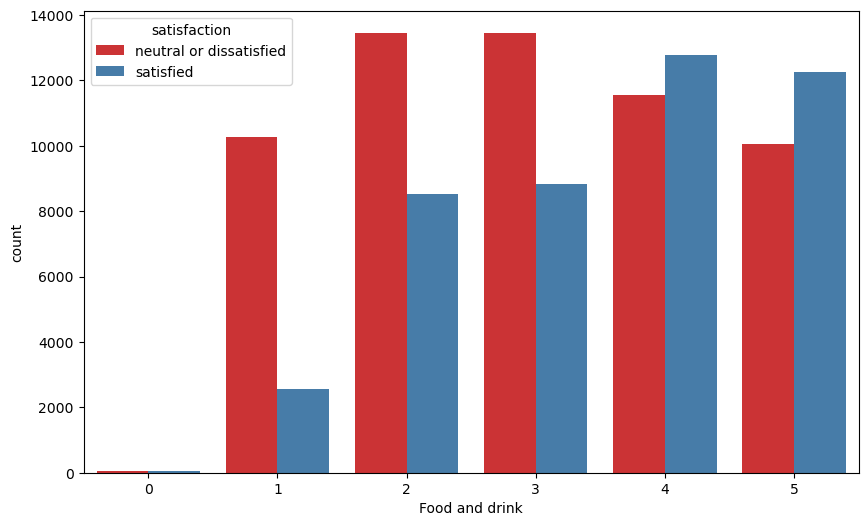

Food and drink
4    24359
5    22313
3    22300
2    21988
1    12837
0      107
Name: count, dtype: int64


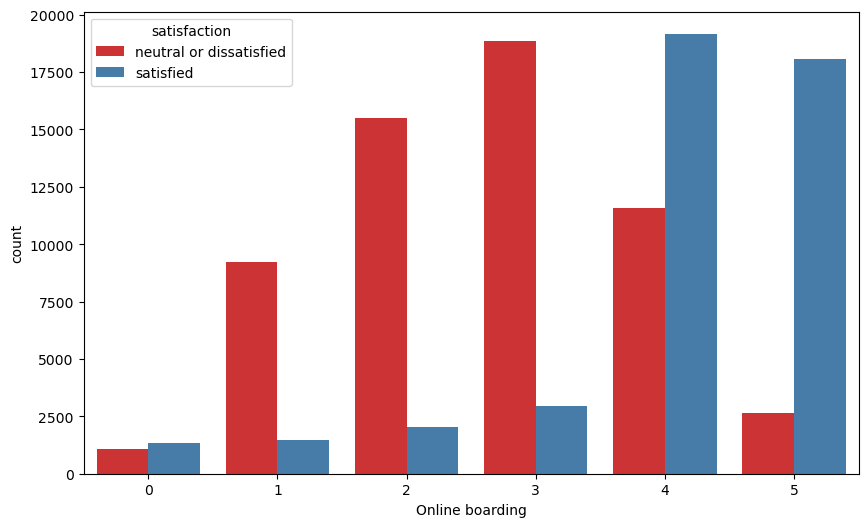

Online boarding
4    30762
3    21804
5    20713
2    17505
1    10692
0     2428
Name: count, dtype: int64


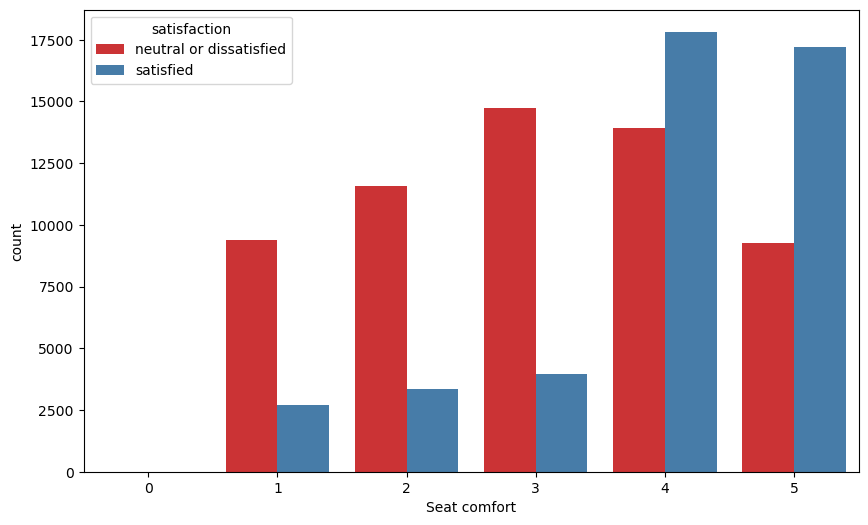

Seat comfort
4    31765
5    26470
3    18696
2    14897
1    12075
0        1
Name: count, dtype: int64


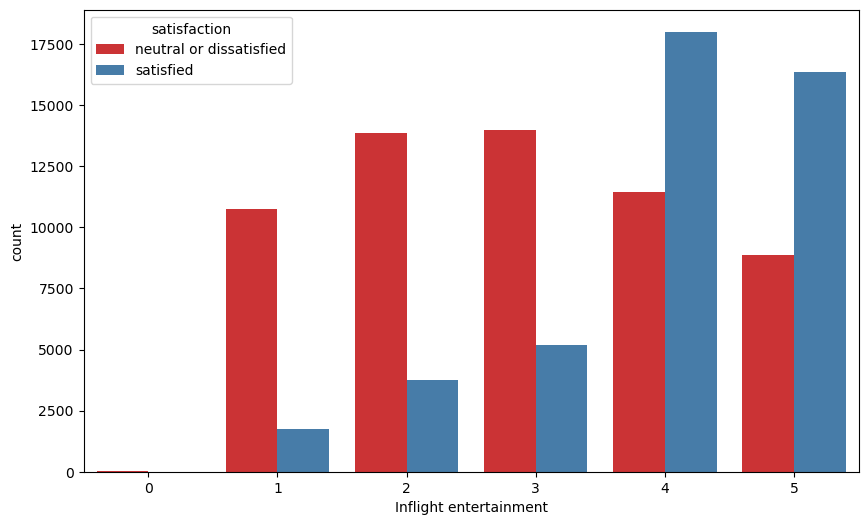

Inflight entertainment
4    29423
5    25213
3    19139
2    17637
1    12478
0       14
Name: count, dtype: int64


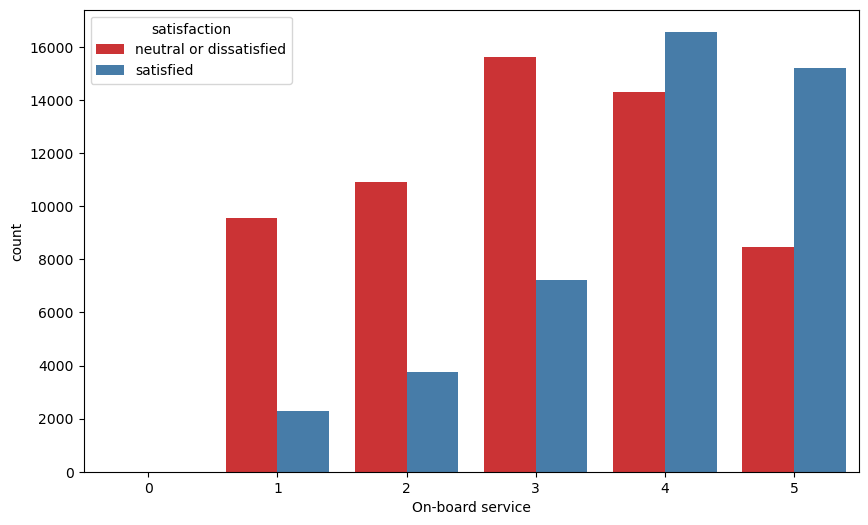

On-board service
4    30867
5    23648
3    22833
2    14681
1    11872
0        3
Name: count, dtype: int64


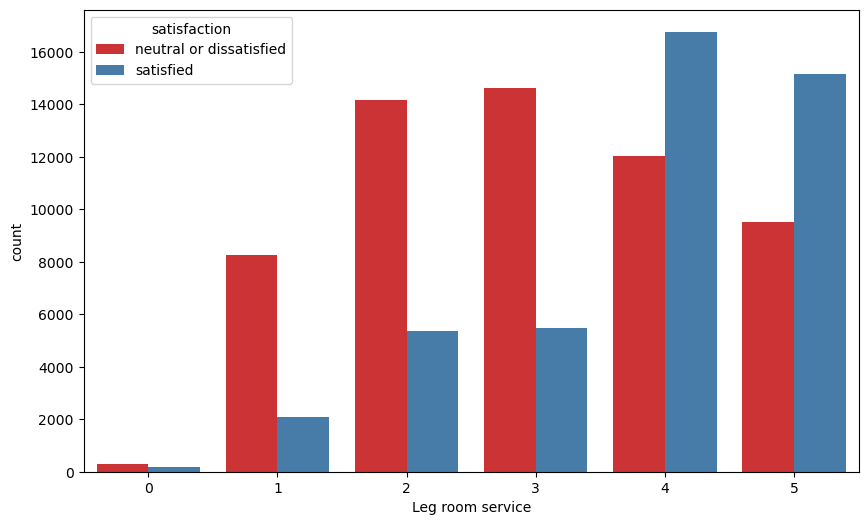

Leg room service
4    28789
5    24667
3    20098
2    19525
1    10353
0      472
Name: count, dtype: int64


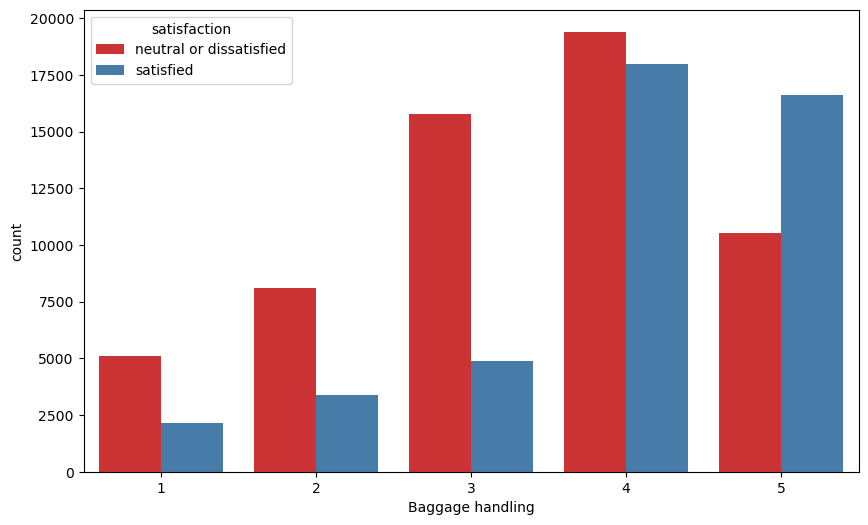

Baggage handling
4    37383
5    27131
3    20632
2    11521
1     7237
Name: count, dtype: int64


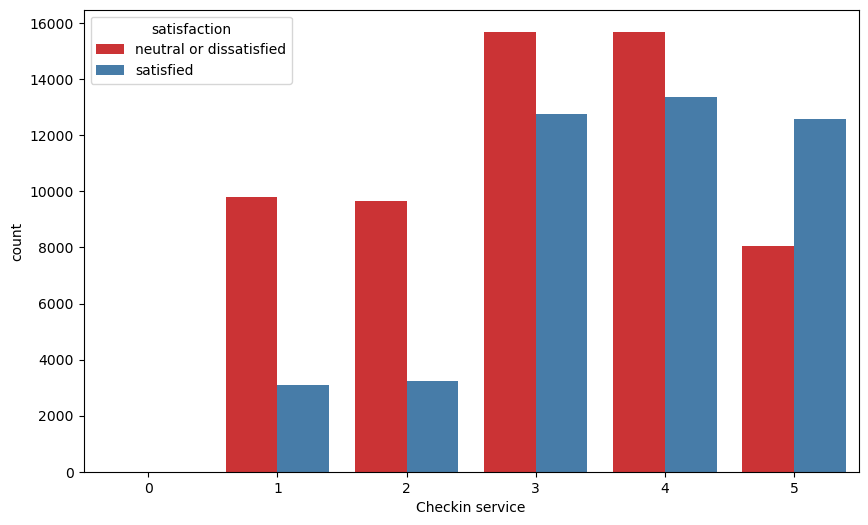

Checkin service
4    29055
3    28446
5    20619
2    12893
1    12890
0        1
Name: count, dtype: int64


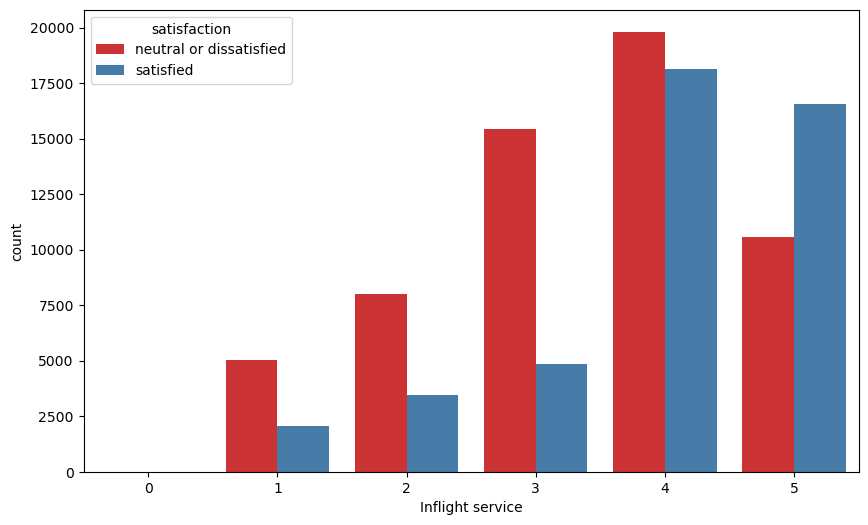

Inflight service
4    37945
5    27116
3    20299
2    11457
1     7084
0        3
Name: count, dtype: int64


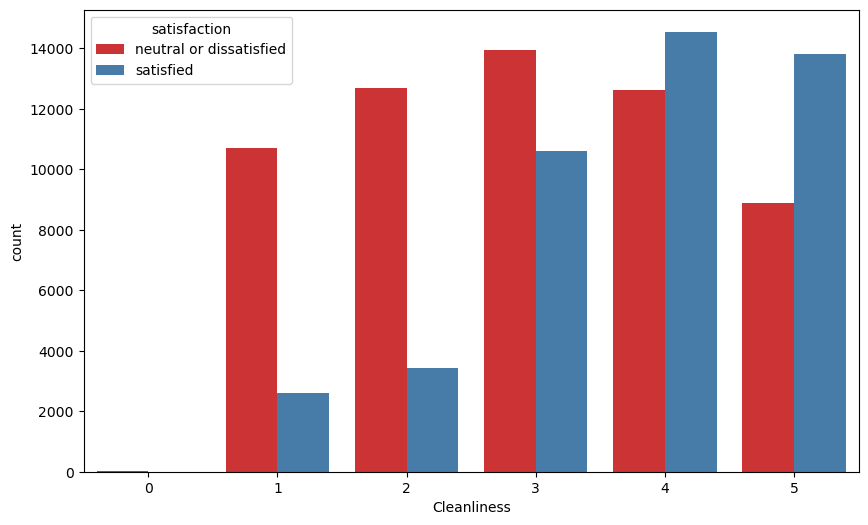

Cleanliness
4    27179
3    24574
5    22689
2    16132
1    13318
0       12
Name: count, dtype: int64


In [33]:
df_labels = df1[['Gender', 'Customer Type', 'Type of Travel', 'Class',
       'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]

labels =['Gender', 'Customer Type', 'Type of Travel', 'Class',
       'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
for label in labels:
    plt.figure(figsize=(10,6))
    sns.countplot(x=label,data=df1, palette = "Set1", hue="satisfaction")
    plt.show()
    print(df1[label].value_counts())

In [ ]:
 # Box - Plots for contionious variables

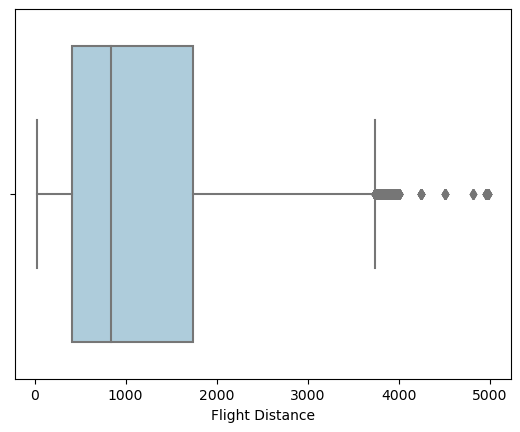

Flight Distance
337     660
594     395
404     392
862     369
2475    369
       ... 
656       1
1364      1
887       1
1206      1
400       1
Name: count, Length: 3802, dtype: int64


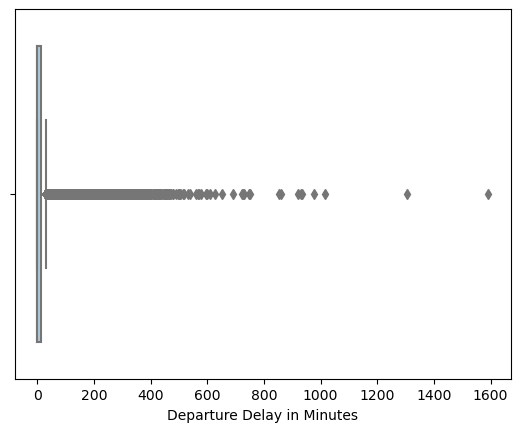

Departure Delay in Minutes
0      58668
1       2948
2       2274
3       2009
4       1854
       ...  
426        1
465        1
321        1
692        1
337        1
Name: count, Length: 446, dtype: int64


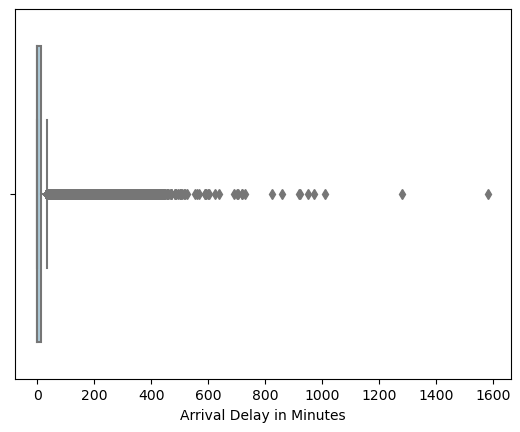

Arrival Delay in Minutes
0.0      58275
1.0       2220
2.0       2072
3.0       1955
4.0       1916
         ...  
291.0        1
458.0        1
729.0        1
382.0        1
369.0        1
Name: count, Length: 456, dtype: int64


In [34]:
cont =df1[["Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]]
cont

cont_df = cont.apply(pd.to_numeric)


for n in cont_df:
    sns.boxplot(data=cont_df, x=n, palette ="Paired").grid(False)
    plt.show()
    print(cont_df[n].value_counts())

In [ ]:
# Box - Plots for discrete variables

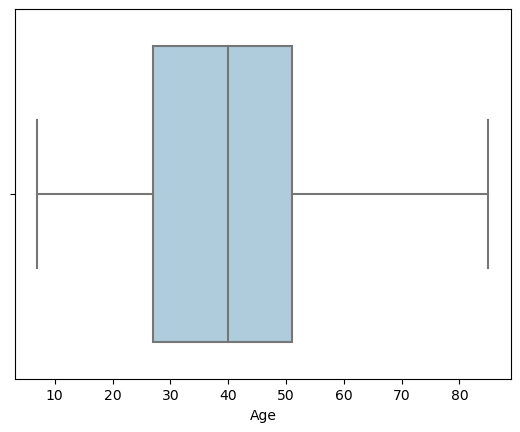

Age
39    2969
25    2798
40    2574
44    2482
42    2457
      ... 
74      47
76      45
79      42
78      33
85      17
Name: count, Length: 75, dtype: int64


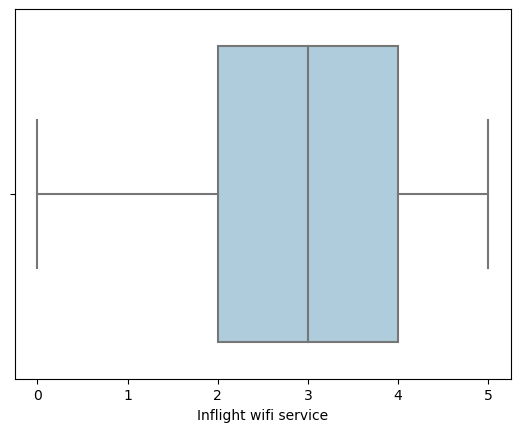

Inflight wifi service
3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: count, dtype: int64


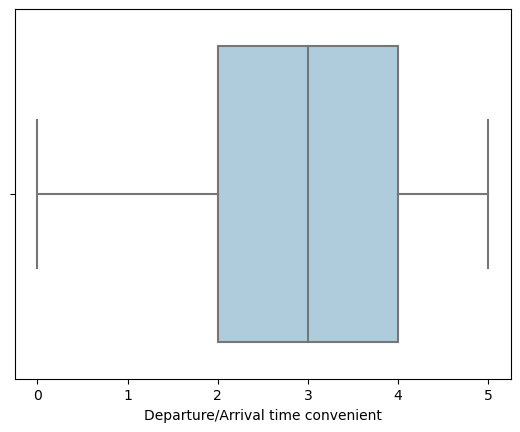

Departure/Arrival time convenient
4    25546
5    22403
3    17966
2    17191
1    15498
0     5300
Name: count, dtype: int64


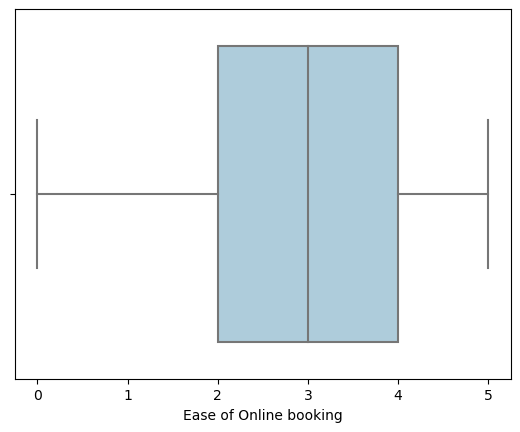

Ease of Online booking
3    24449
2    24021
4    19571
1    17525
5    13851
0     4487
Name: count, dtype: int64


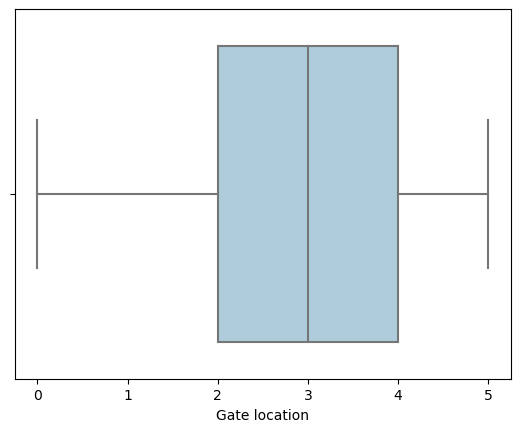

Gate location
3    28577
4    24426
2    19459
1    17562
5    13879
0        1
Name: count, dtype: int64


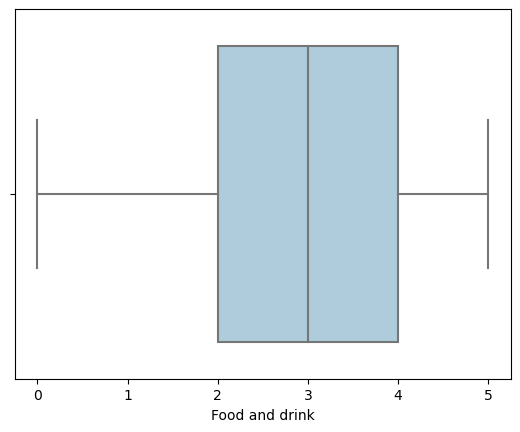

Food and drink
4    24359
5    22313
3    22300
2    21988
1    12837
0      107
Name: count, dtype: int64


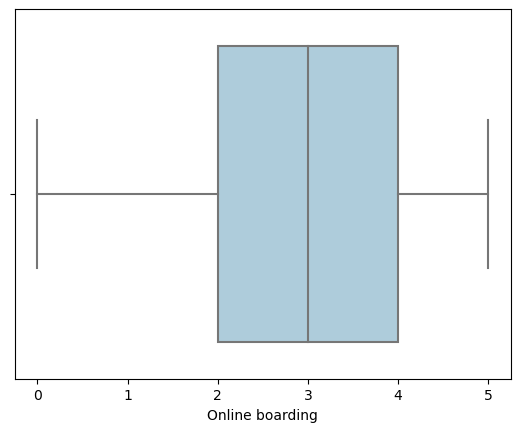

Online boarding
4    30762
3    21804
5    20713
2    17505
1    10692
0     2428
Name: count, dtype: int64


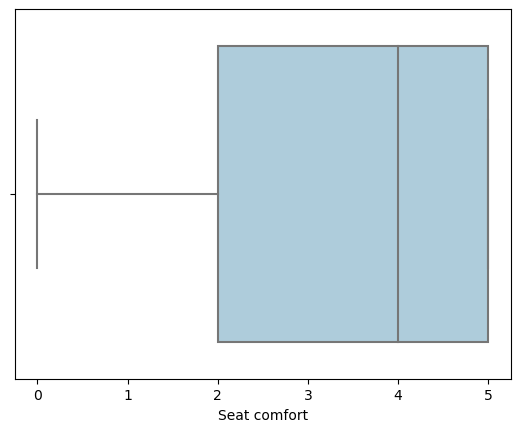

Seat comfort
4    31765
5    26470
3    18696
2    14897
1    12075
0        1
Name: count, dtype: int64


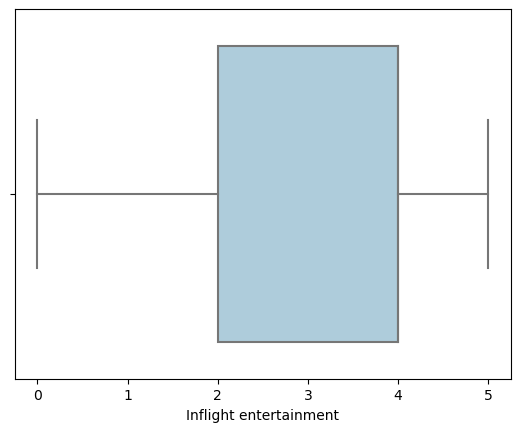

Inflight entertainment
4    29423
5    25213
3    19139
2    17637
1    12478
0       14
Name: count, dtype: int64


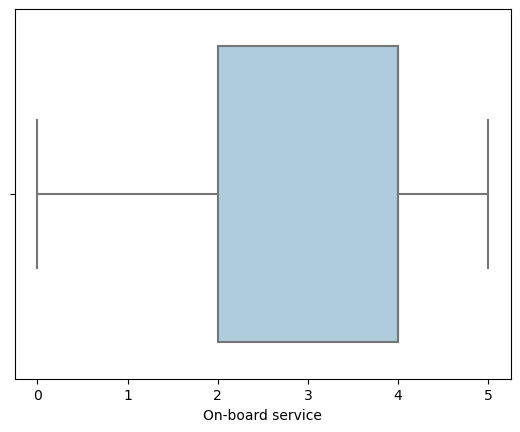

On-board service
4    30867
5    23648
3    22833
2    14681
1    11872
0        3
Name: count, dtype: int64


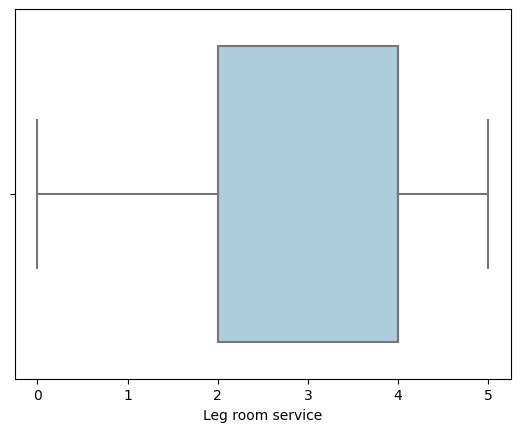

Leg room service
4    28789
5    24667
3    20098
2    19525
1    10353
0      472
Name: count, dtype: int64


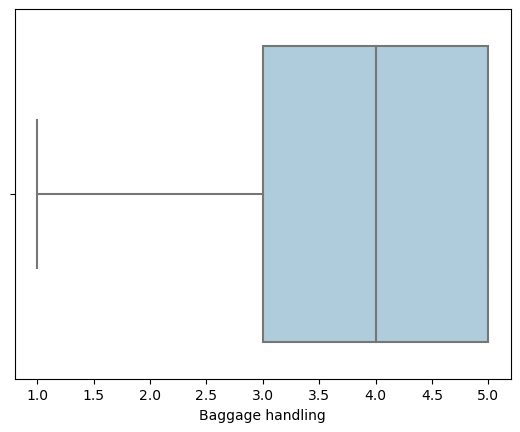

Baggage handling
4    37383
5    27131
3    20632
2    11521
1     7237
Name: count, dtype: int64


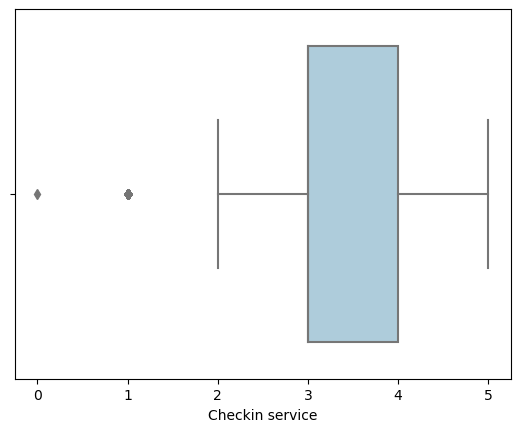

Checkin service
4    29055
3    28446
5    20619
2    12893
1    12890
0        1
Name: count, dtype: int64


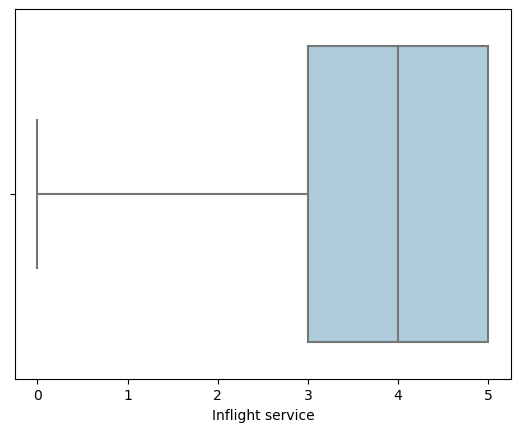

Inflight service
4    37945
5    27116
3    20299
2    11457
1     7084
0        3
Name: count, dtype: int64


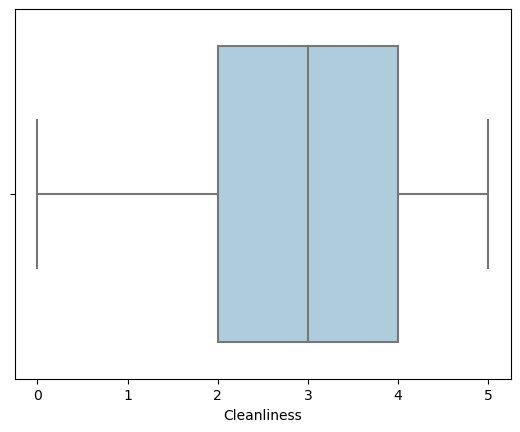

Cleanliness
4    27179
3    24574
5    22689
2    16132
1    13318
0       12
Name: count, dtype: int64


In [35]:
import seaborn as sns


labels = ['Age', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

for label in labels:
    sns.boxplot(x=label,data=df1, palette ="Paired").grid(False)
    plt.show()

    print(df1[label].value_counts())

# Machine Learning

In [36]:
df2=df1.copy()
df2.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [37]:
df2.shape

(103904, 23)

# Data preprocessing

In [38]:
from sklearn.preprocessing import LabelEncoder
lencoders={}
for col in df2.select_dtypes(include=['object']).columns:
    lencoders[col]=LabelEncoder()
    df2[col]=lencoders[col].fit_transform(df2[col])

In [39]:
df2.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


# outlier Detection and removal

In [40]:
q1=df2.quantile(0.25)
q3=df2.quantile(0.75)
IQR=q3-q1
print(IQR)

Gender                                  1.0
Customer Type                           0.0
Age                                    24.0
Type of Travel                          1.0
Class                                   1.0
Flight Distance                      1329.0
Inflight wifi service                   2.0
Departure/Arrival time convenient       2.0
Ease of Online booking                  2.0
Gate location                           2.0
Food and drink                          2.0
Online boarding                         2.0
Seat comfort                            3.0
Inflight entertainment                  2.0
On-board service                        2.0
Leg room service                        2.0
Baggage handling                        2.0
Checkin service                         1.0
Inflight service                        2.0
Cleanliness                             2.0
Departure Delay in Minutes             12.0
Arrival Delay in Minutes               13.0
satisfaction                    

In [41]:
# Removing outliers from dataset
train=df2[~((df2<(q1-1.5*IQR)) |(df2>(q3+1.5*IQR))).any(axis=1)]
train.shape

(61197, 23)

 # Correlation among Features

<Axes: >

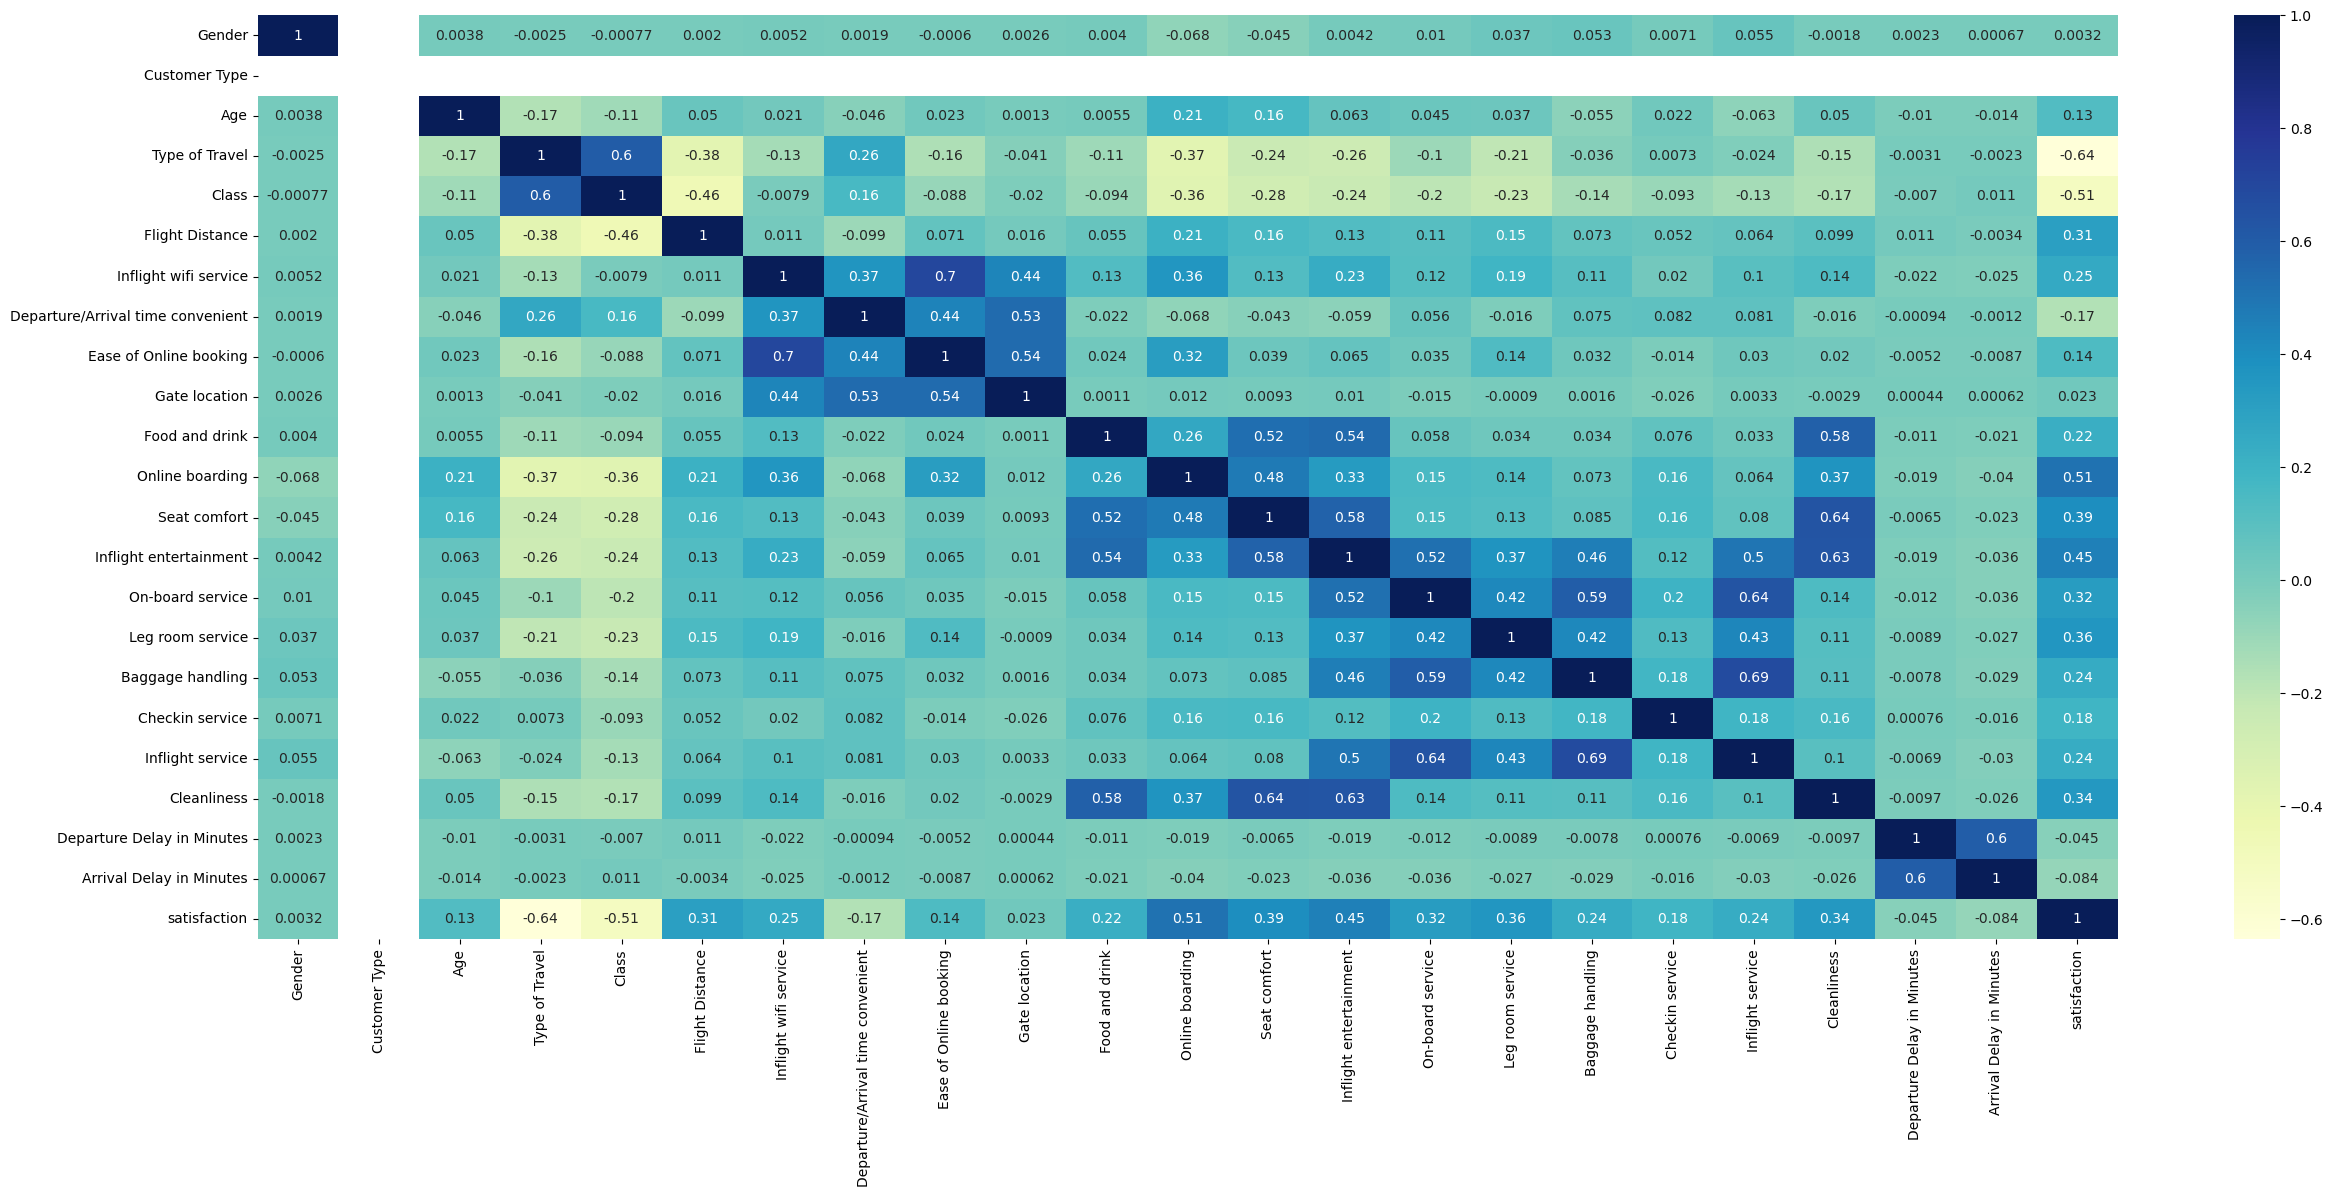

In [42]:
corr=train.corr()
plt.figure(figsize=(30,12))
sns.heatmap(corr,annot=True,cmap='YlGnBu')


<Axes: >

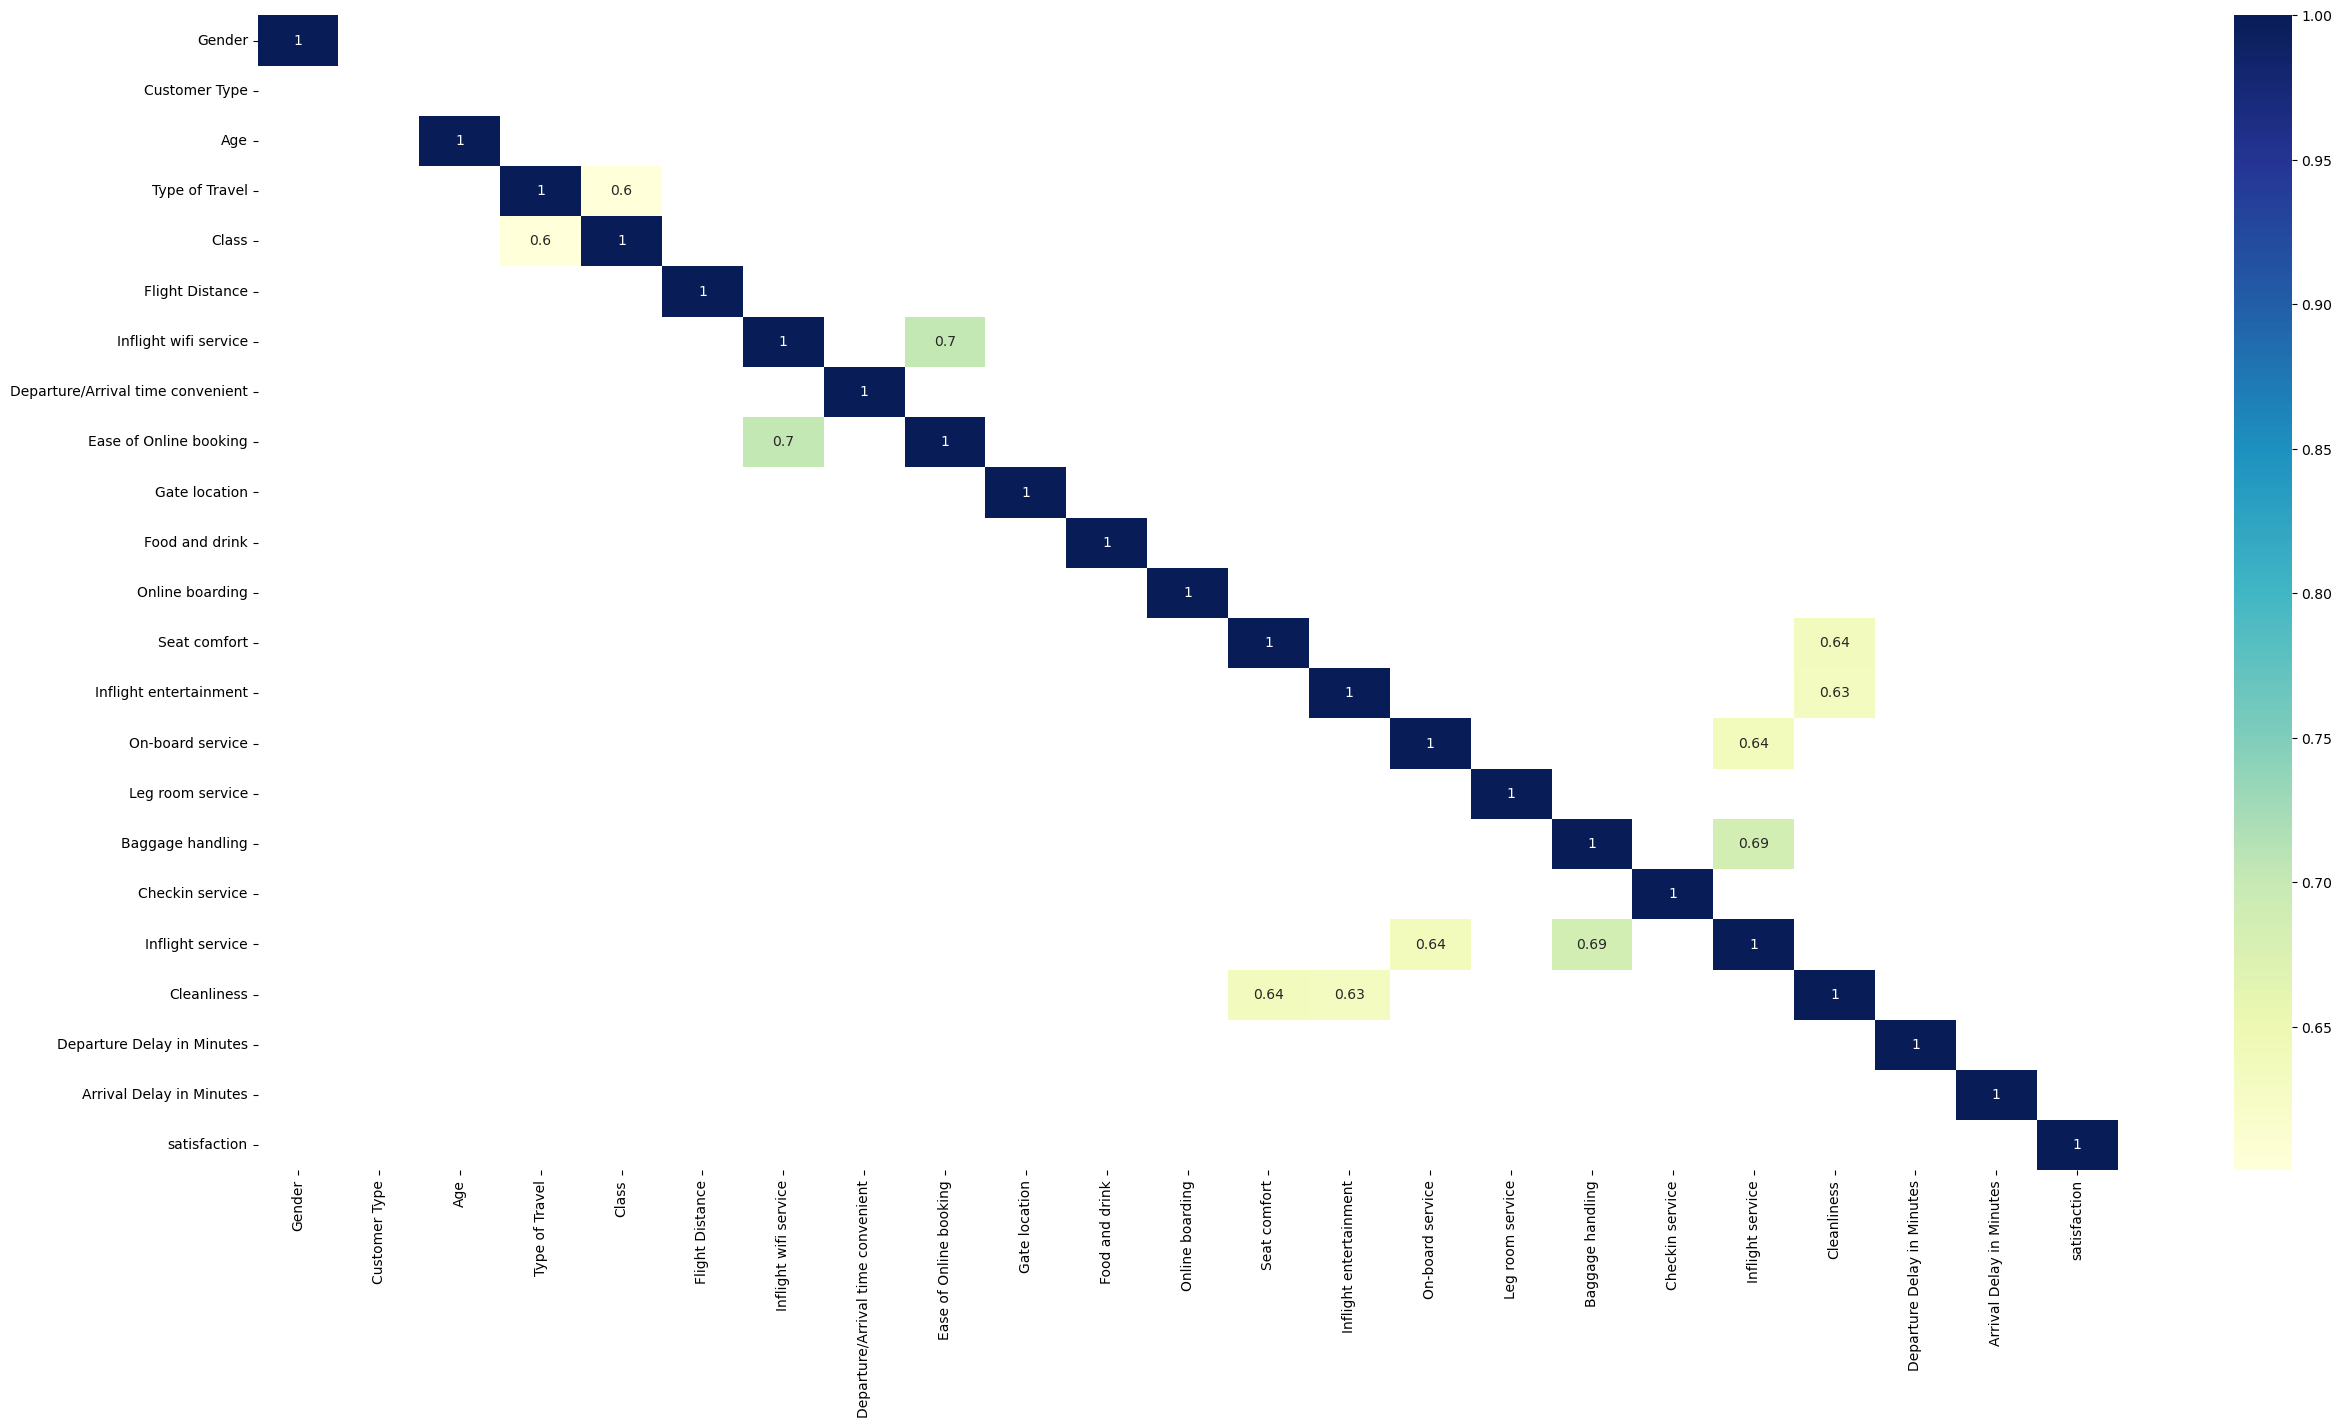

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr=train.corr()
corr=train.corr()
kot=corr[corr>=.60] #filter correlation pairs higher than 0.6
plt.figure(figsize=(30,15))
sns.heatmap(kot, annot=True,cmap='YlGnBu')

Ease of Online booking" and "Inflight wifi service" are positive correlated with ratio 0.71.

"Inflight entertainment" and "Food and drink" are positive correlated with ratio 0.62.

"Inflight entertainment" and "Seat comfort" are positive correlated with ratio 0.61.

"Inflight service" and "Baggage handling" are positive correlated with ratio 0.63.

"Cleanliness" and "Food and drink" are positive correlated with ratio 0.66.

"Cleanliness" and "Seat comfort" are positive correlated with ratio 0.68.

"Cleanliness" and "Inflight entertainment" are positive correlated with ratio 0.69.

'Departure delay in minutes' and 'Arrival delay in minutes' columns are highly positive correlated (0.97)

# MIN-MAX Scalling

In [44]:
from sklearn import preprocessing

r_scaler=preprocessing.MinMaxScaler()
r_scaler.fit(train)

data=pd.DataFrame(r_scaler.transform(train),columns=train.columns)
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1.0,0.0,0.076923,1.0,1.0,0.115789,0.6,0.8,0.6,0.2,...,1.0,0.8,0.6,0.75,0.666667,1.0,1.0,0.833333,0.56250,0.0
1,0.0,0.0,0.243590,0.0,0.0,0.299865,0.4,0.4,0.4,0.4,...,1.0,0.8,0.6,0.75,0.666667,0.8,1.0,0.000000,0.00000,1.0
2,1.0,0.0,0.692308,0.0,0.0,0.049393,0.6,0.6,0.6,0.6,...,0.6,0.6,0.8,0.75,0.333333,0.6,0.6,0.000000,0.00000,1.0
3,0.0,0.0,0.243590,1.0,0.5,0.310121,0.6,0.8,0.4,0.2,...,0.2,0.6,0.8,0.75,0.666667,0.8,0.2,0.000000,0.00000,0.0
4,1.0,0.0,0.512821,1.0,0.5,0.336032,0.4,0.8,0.4,0.6,...,0.4,0.6,0.6,0.75,0.333333,1.0,0.4,0.300000,0.71875,0.0


 # model Fitting

In [45]:
from sklearn.feature_selection import SelectFromModel

x=data.drop('satisfaction',axis=1)
y=data['satisfaction']

In [46]:
x.shape

(61197, 22)

In [47]:
y.shape

(61197,)

In [48]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import accuracy_score,log_loss,precision_score,roc_auc_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [50]:
print("Shape of X_train is:", x_train.shape)
print("Shape of X_test is:", x_test.shape)
print("Shape of y_train is:", y_train.shape)
print("Shape of y_test is:", y_test.shape)

Shape of X_train is: (48957, 22)
Shape of X_test is: (12240, 22)
Shape of y_train is: (48957,)
Shape of y_test is: (12240,)


In [51]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    pred_prob_test=model.predict_proba(X_test) 
    
    #calculating precision and reall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Accuracy = {}".format(accuracy))
    print('Precision: ', precision)
    print('Recall: ', recall)  
    print('F1 Score: ',f1)  
    
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print(classification_report(y_test,y_pred,digits=5))
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
    #Plot ROC_AUC Curve
    # Predict probabilities on the test data
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Calculate the AUC score
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()                  
    
    return model, accuracy, precision, recall, f1, roc_auc

# Logistic regression

Accuracy = 0.893545751633987
Precision:  0.9033383158943697
Recall:  0.8829545454545454
F1 Score:  0.8930301288892537
Accuracy = 0.893545751633987
ROC Area under Curve = 0.8936154306220095
              precision    recall  f1-score   support

         0.0    0.88406   0.90428   0.89406      6080
         1.0    0.90334   0.88295   0.89303      6160

    accuracy                        0.89355     12240
   macro avg    0.89370   0.89362   0.89354     12240
weighted avg    0.89376   0.89355   0.89354     12240



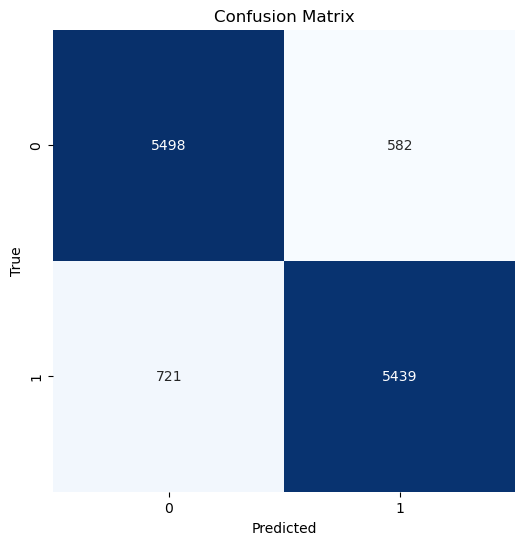

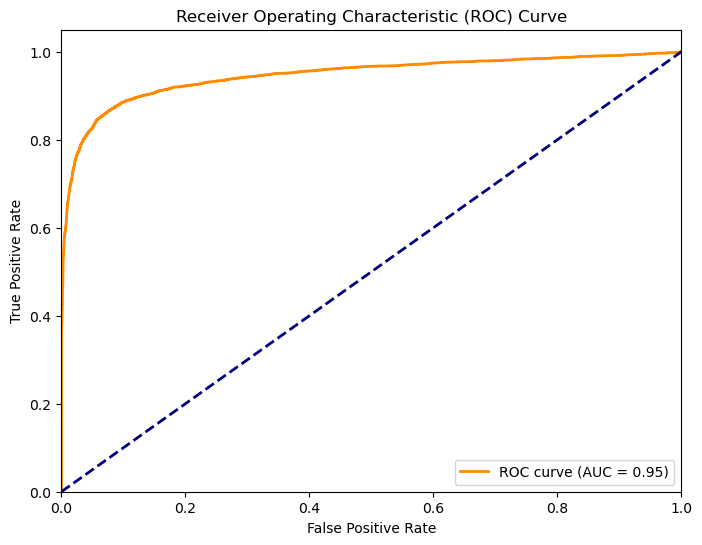

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import recall_score
params_lr = {"class_weight": None, "solver":'lbfgs', "max_iter":1000}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, precision_lr, recall_lr, f1_lr, roc_auc_lr = run_model(model_lr, x_train, y_train, x_test, y_test)

# Decisison Tree

Accuracy = 0.9510620915032679
Precision:  0.9599669148056245
Recall:  0.9420454545454545
F1 Score:  0.9509217533797623
Accuracy = 0.9510620915032679
ROC Area under Curve = 0.9511214114832536
              precision    recall  f1-score   support

         0.0    0.94237   0.96020   0.95120      6080
         1.0    0.95997   0.94205   0.95092      6160

    accuracy                        0.95106     12240
   macro avg    0.95117   0.95112   0.95106     12240
weighted avg    0.95123   0.95106   0.95106     12240



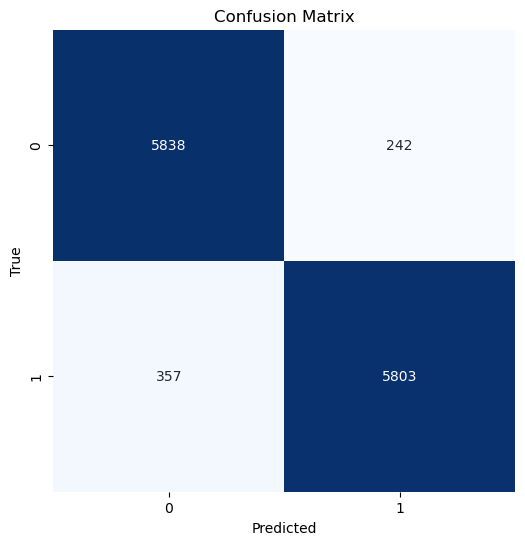

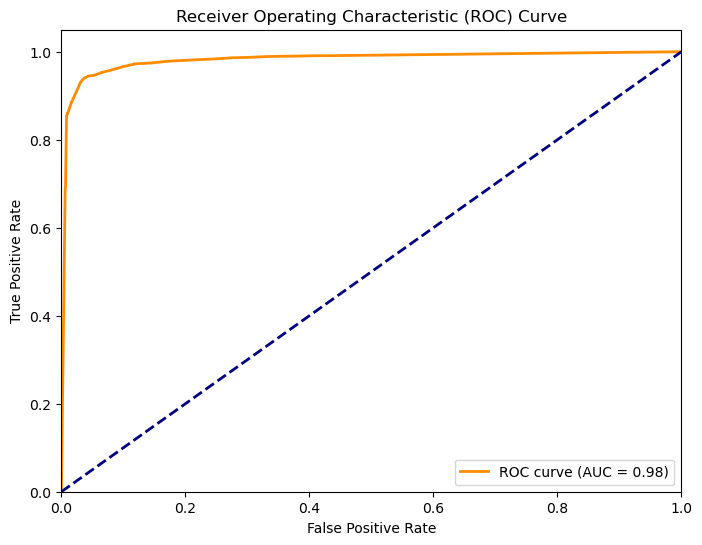

In [53]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 12,    
             'max_features': "sqrt",
             }

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, precision_dt, recall_dt, f1_dt, roc_auc_dt = run_model(model_dt, x_train, y_train, x_test, y_test)

# Random Forest

Accuracy = 0.9665849673202614
Precision:  0.979649708090075
Recall:  0.9534090909090909
F1 Score:  0.9663512957630604
Accuracy = 0.9665849673202614
ROC Area under Curve = 0.9666716507177033
              precision    recall  f1-score   support

         0.0    0.95404   0.97993   0.96682      6080
         1.0    0.97965   0.95341   0.96635      6160

    accuracy                        0.96658     12240
   macro avg    0.96685   0.96667   0.96658     12240
weighted avg    0.96693   0.96658   0.96658     12240



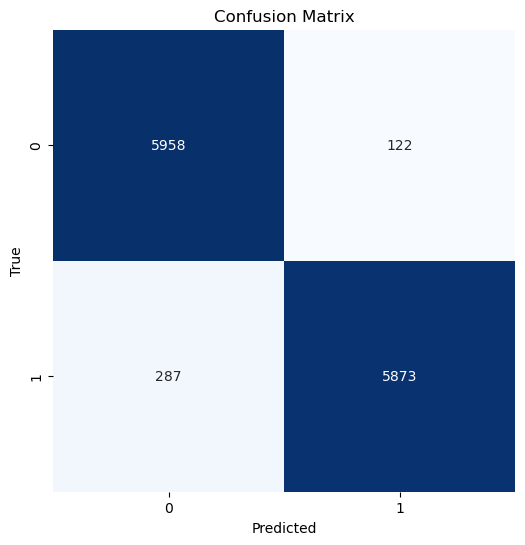

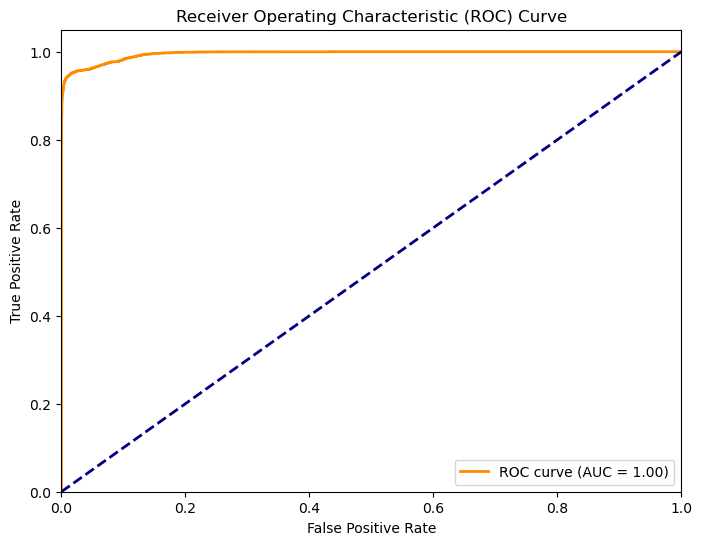

In [54]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 123}

model_rf = RandomForestClassifier(**params_rf)

model_rf, accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf = run_model(model_rf, x_train, y_train, x_test, y_test)

X-GBoost

In [25]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 325.1 kB/s eta 0:05:07
   ---------------------------------------- 0.1/99.8 MB 544.7 kB/s eta 0:03:04
   ---------------------------------------- 0.1/99.8 MB 901.1 kB/s eta 0:01:51
   ---------------------------------------- 0.2/99.8 MB 1.4 MB/s eta 0:01:13
   ---------------------------------------- 0.4/99.8 MB 2.0 MB/s eta 0:00:51
   ---------------------------------------- 0.5/99.8 MB 2.2 MB/s eta 0:00:45
   ---------------------------------------- 0.6/99.8 MB 2.3 MB/s eta 0:00:43
   ---------------------------------------- 0.7/99.8 MB 2.3 MB/s eta 0:00:43
   ------------------------------

Accuracy = 0.9665849673202614
Precision:  0.9775784753363229
Recall:  0.9555194805194805
F1 Score:  0.96642311797061
Accuracy = 0.9665849673202614
ROC Area under Curve = 0.9666577665755297
              precision    recall  f1-score   support

         0.0    0.95594   0.97780   0.96675      6080
         1.0    0.97758   0.95552   0.96642      6160

    accuracy                        0.96658     12240
   macro avg    0.96676   0.96666   0.96658     12240
weighted avg    0.96683   0.96658   0.96658     12240



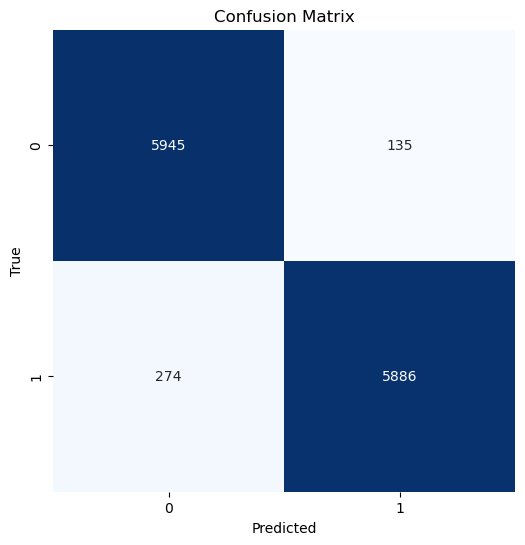

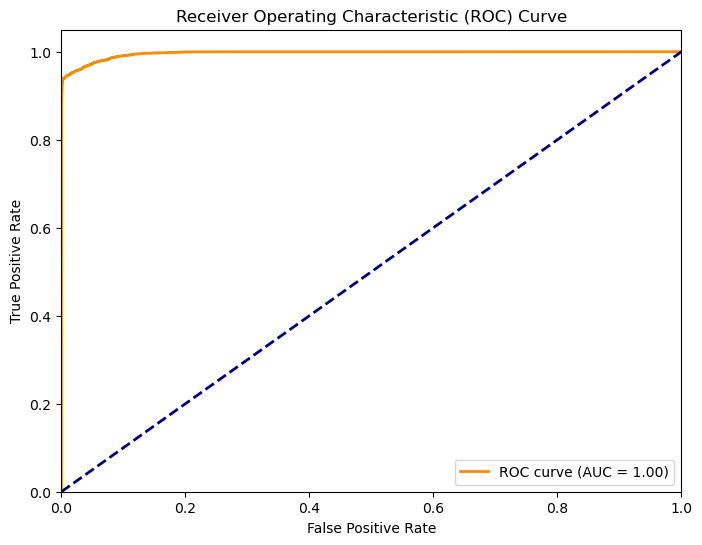

In [55]:
import xgboost as xgb

params_xgb ={'n_estimators': 100,
            'max_depth': 10}

model_xgb = xgb.XGBClassifier(**params_xgb)

model_xgb, accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, roc_auc_xgb = run_model(model_xgb, x_train, y_train, x_test, y_test)

# Svm

Accuracy = 0.8946895424836602
Precision:  0.9131467345207803
Recall:  0.8738636363636364
F1 Score:  0.8930734135213604
Accuracy = 0.8946895424836602
ROC Area under Curve = 0.8948265550239235
              precision    recall  f1-score   support

         0.0    0.87754   0.91579   0.89626      6080
         1.0    0.91315   0.87386   0.89307      6160

    accuracy                        0.89469     12240
   macro avg    0.89534   0.89483   0.89467     12240
weighted avg    0.89546   0.89469   0.89466     12240



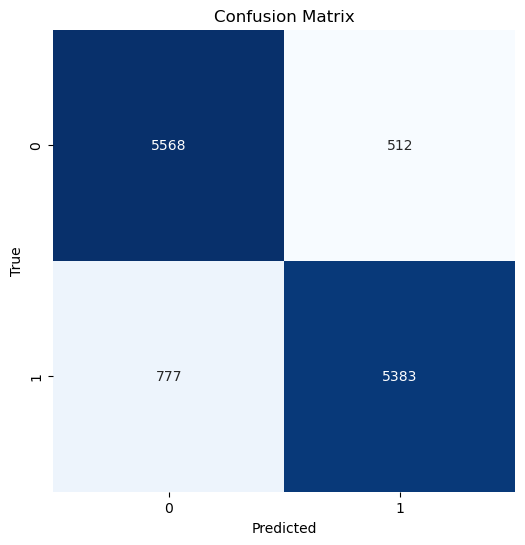

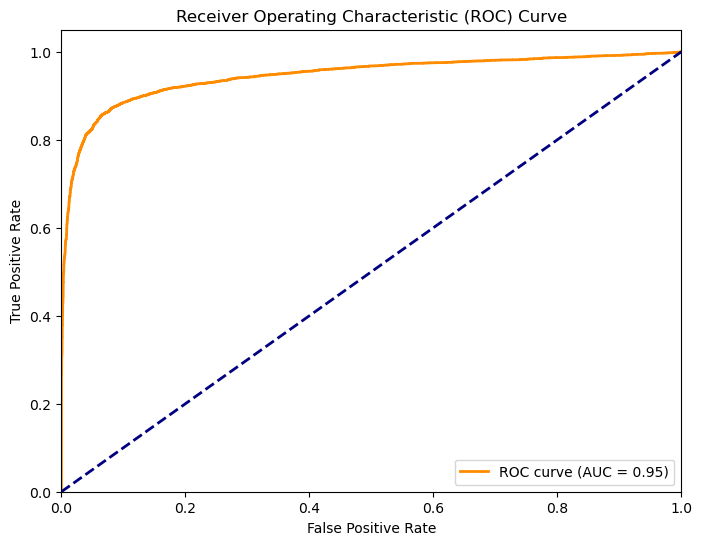

In [69]:
from sklearn.svm import SVC

params_svc ={"kernel":'linear', "probability":True, "class_weight":"balanced"}

model_svc= SVC(**params_svc)

model_svc, accuracy_svc, precision_svc, recall_svc, f1_svc, roc_auc_svc = run_model(model_svc, x_train, y_train, x_test, y_test)

# Model Comparision

In [58]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_svc]

model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','XGBoost', "SVM"],
              'Accuracy Score': accuracy_scores}

data = pd.DataFrame(model_data)
data["Accuracy Score"] = (data["Accuracy Score"]*100)

data

,Model,Accuracy Score
0,Logistic Regression,89.354575
1,Decision Tree,95.106209
2,Random Forest,96.658497
3,XGBoost,96.658497
4,SVM,89.468954


In [63]:
data= data.sort_values(by= "Accuracy Score", ascending=True)

data

,Model,Accuracy Score
0,Logistic Regression,89.354575
4,SVM,89.468954
1,Decision Tree,95.106209
2,Random Forest,96.658497
3,XGBoost,96.658497


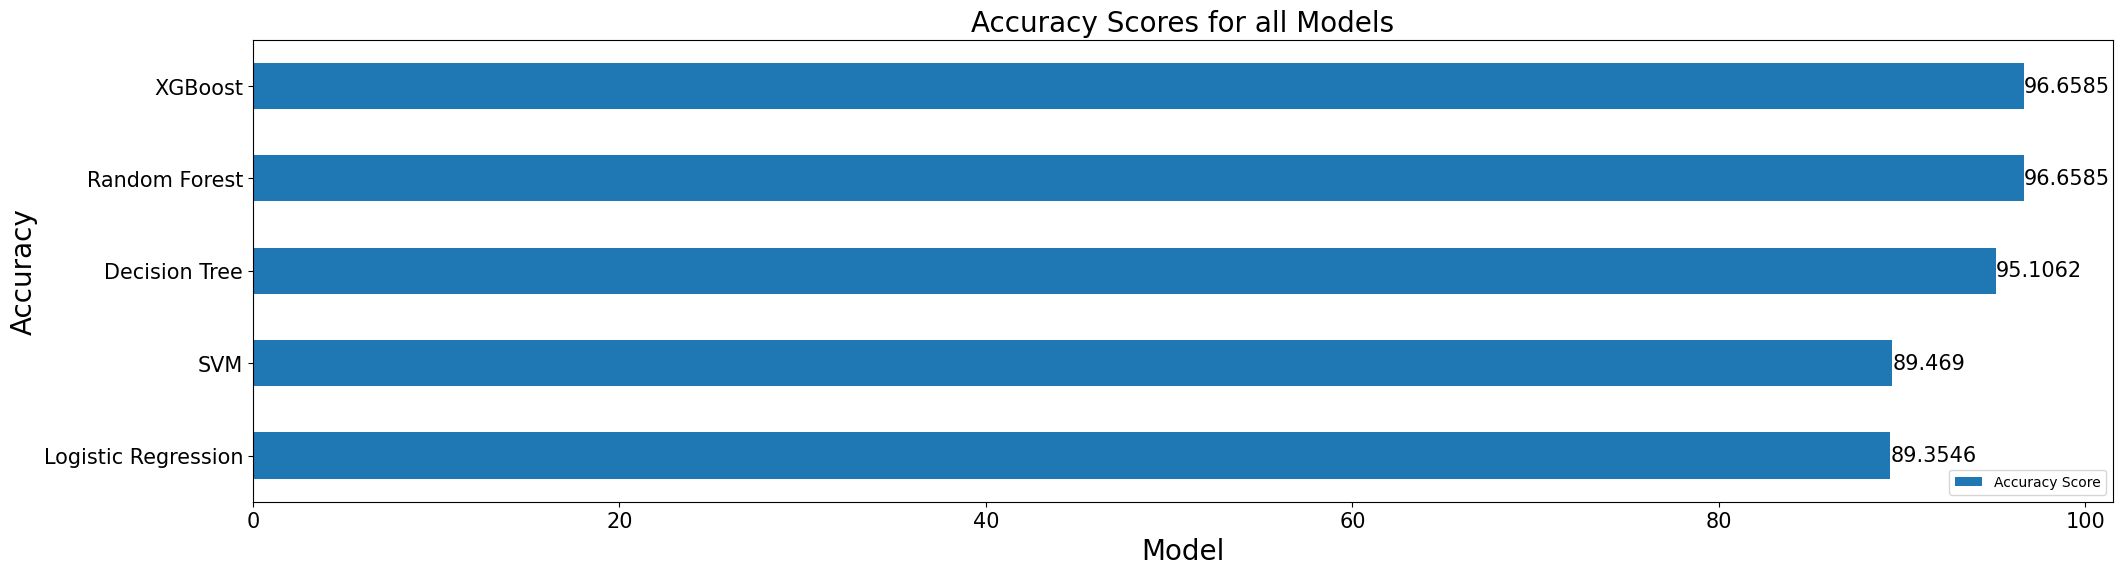

In [64]:
ax = data.sort_values(by="Accuracy Score", ascending = True).plot( x= "Model", y="Accuracy Score", kind='barh', figsize=(24,6), fontsize=15)
ax.bar_label(ax.containers[0], fontsize=15)
plt.xlabel("Model", fontsize=20)

plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy Scores for all Models", fontsize=20)
plt.show()

In [65]:
rocauc_scores = [roc_auc_lr , roc_auc_dt, roc_auc_rf, roc_auc_xgb,roc_auc_svc ]

precision_scores = [precision_lr,precision_dt,precision_rf,precision_xgb, precision_svc]

recall_scores = [recall_lr,recall_dt,recall_rf,recall_xgb,recall_svc ]

f1_scores = [f1_lr, f1_dt,f1_rf, f1_xgb, f1_svc]

Model = ['Logistic Regression','Decision Tree','Random Forest','XGBoost', "SVM"]
              

comp = pd.DataFrame(list(zip( Model, precision_scores, recall_scores, f1_scores, rocauc_scores)), columns =["MODEL", "PRECISION", "RECALL", "F1_SCORE", "ROC_AUC"])
# setting first name as index column
comp.set_index("MODEL", inplace = True)

comp

,PRECISION,RECALL,F1_SCORE,ROC_AUC
MODEL,,,,
Logistic Regression,0.903338,0.882955,0.893030,0.945951
Decision Tree,0.959967,0.942045,0.950922,0.981755
Random Forest,0.979650,0.953409,0.966351,0.995403
XGBoost,0.977578,0.955519,0.966423,0.996539
SVM,0.913147,0.873864,0.893073,0.945269


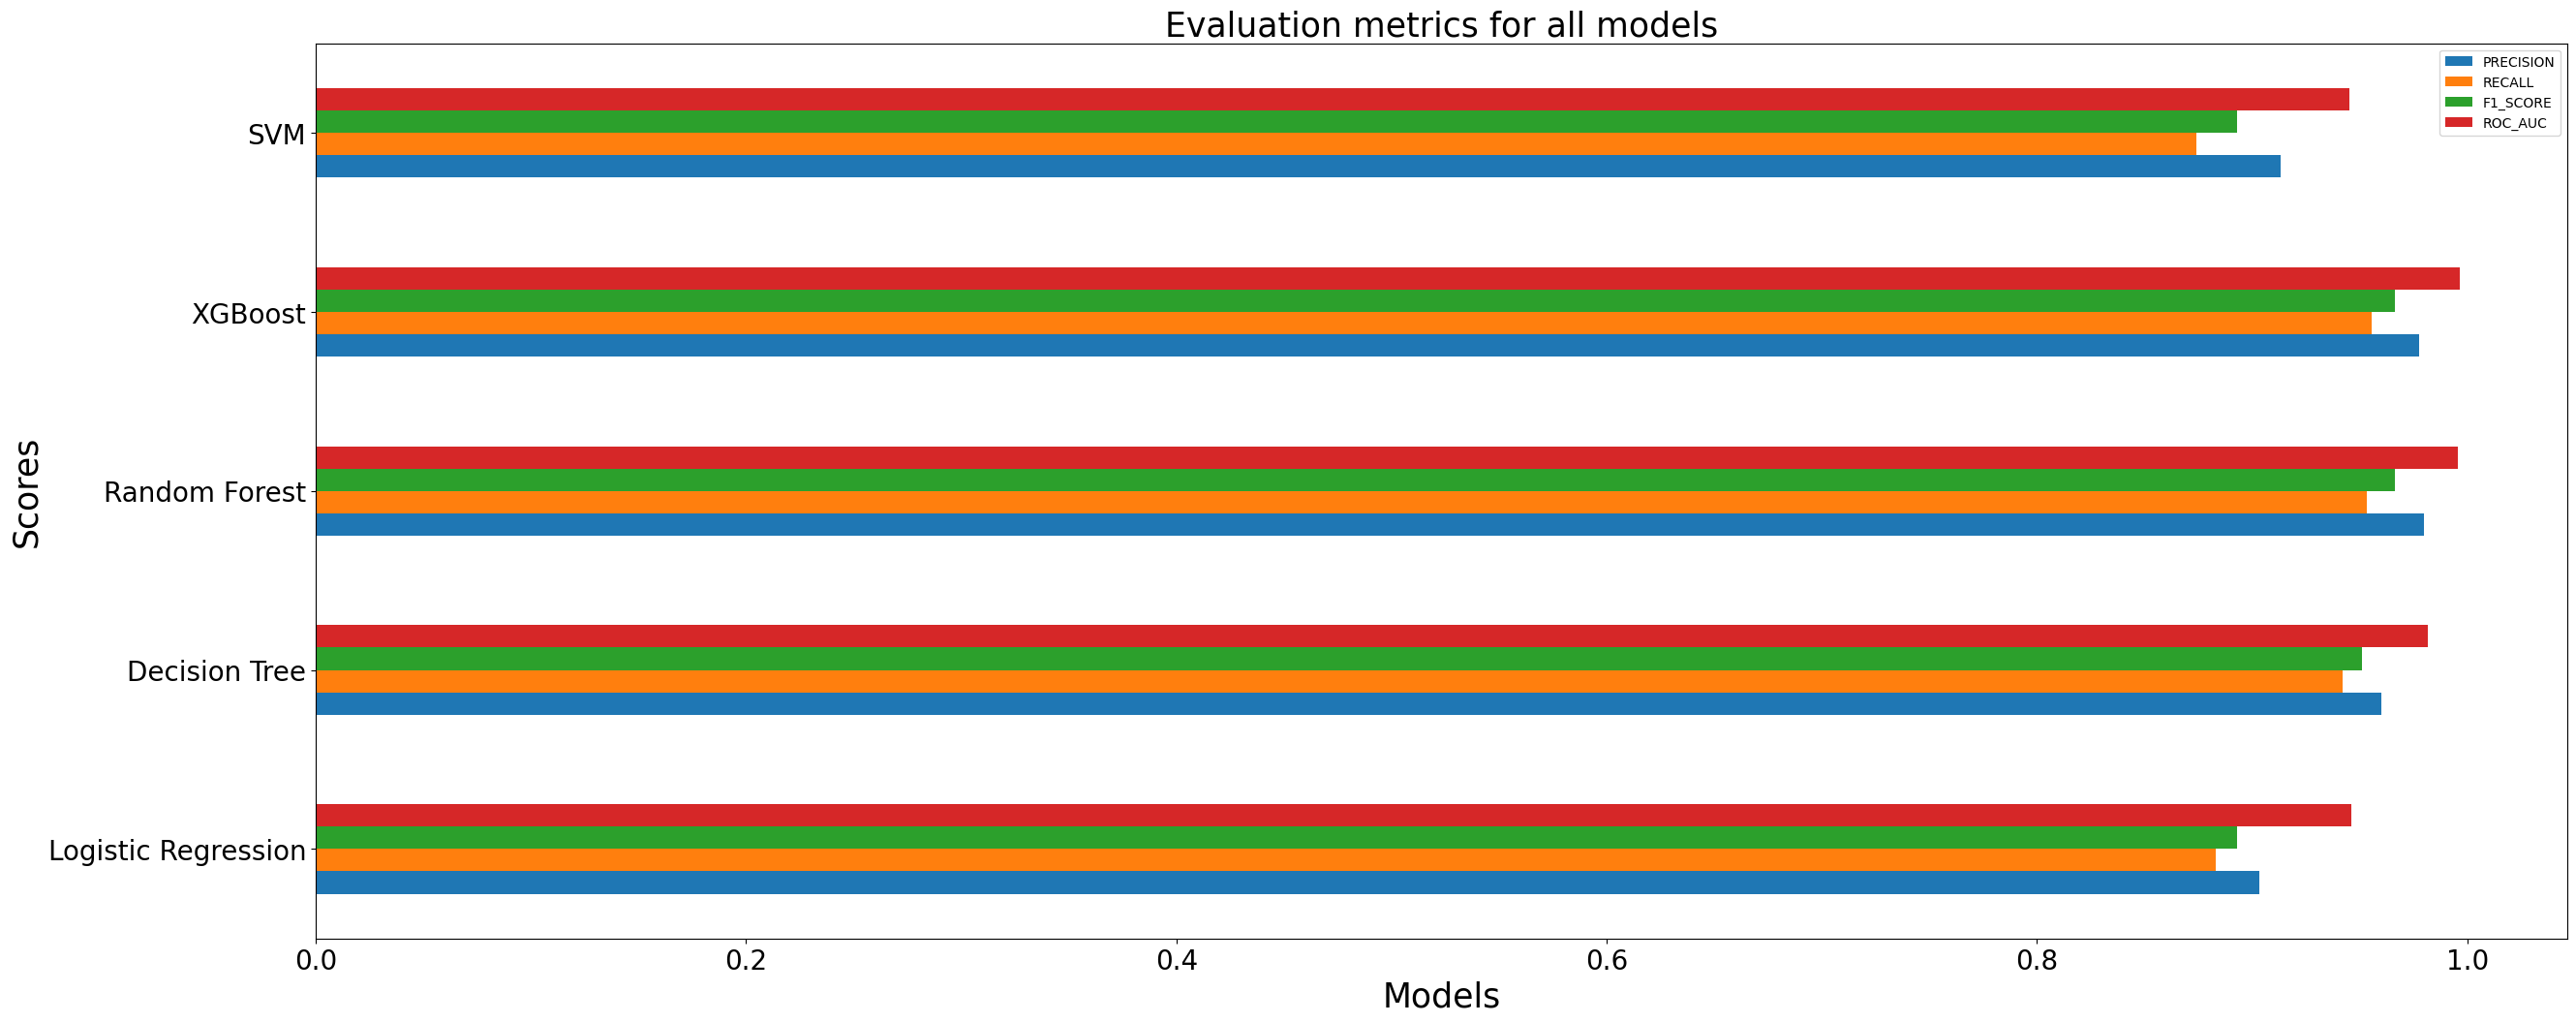

In [66]:
comp.plot(kind="barh", figsize=(30,12))
plt.xlabel("Models", fontsize =25)
plt.ylabel("Scores", fontsize=25)
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)
plt.title("Evaluation metrics for all models", fontsize = 25)

plt.show()

# Champion model --xgboost

In [67]:
yhat_xgb = model_xgb.predict(x_test)
yhat_xgb

array([1, 0, 0, ..., 1, 0, 1])

# Predicted class using XGBOOST

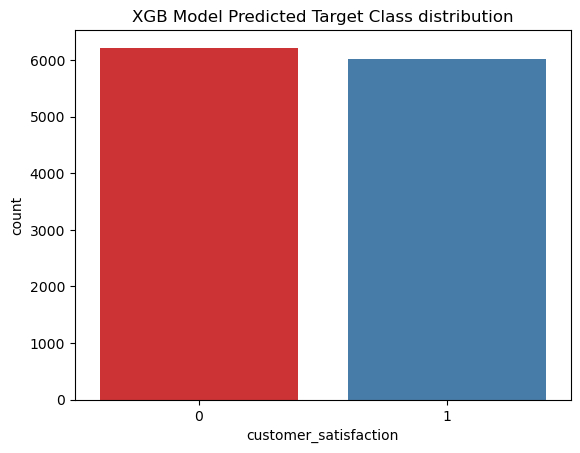

In [68]:
type(yhat_xgb)


# converting the NumPy array to a Pandas series
series = pd.Series(yhat_xgb)
series

df_xgb = pd.DataFrame(series, columns =["customer_satisfaction"])
df_xgb

sns.countplot(x= df_xgb.customer_satisfaction, data = df_xgb, palette = "Set1")
plt.title("XGB Model Predicted Target Class distribution", fontsize=12)
plt.show()

# Feature Importances

<Figure size 3000x1500 with 0 Axes>

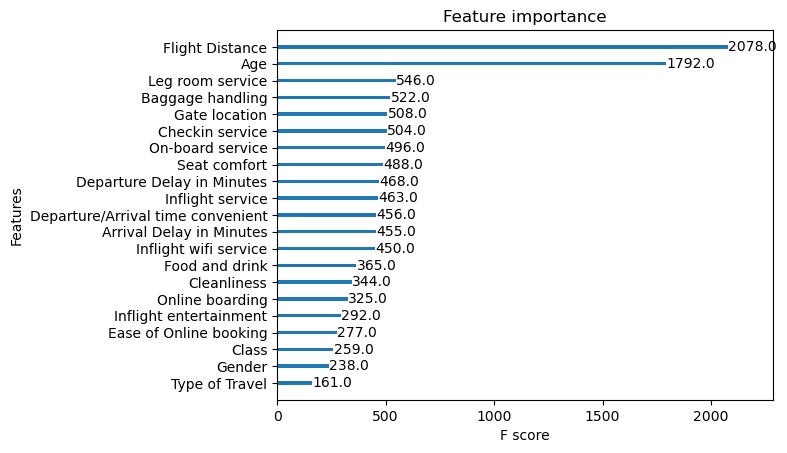

In [62]:
from xgboost import plot_importance

# plot feature importance
plt.figure(figsize=(30,15))
plot_importance(model_xgb, grid=False)
plt.show()